# **<자동심장충격기(AED) 최적 설치 우선순위 지역 분석 프로젝트>**

# <포트폴리오>

In [1]:
# 필요한 라이브러리 불러오기 
import pandas as pd
import numpy as np
import seaborn as sns # 데이터 시각화 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리

#window 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

#데이터를 차트나 플롯(plot)으로 그려주는 라이브러리
import matplotlib

# 지도 시각화 라이브러리
import folium
import json

# 바로 그래프 보여주기 위해
%matplotlib inline 

In [2]:
#retina 설정
from IPython.display import set_matplotlib_formats
#폰트를 선명하게 하기 위한 설정
set_matplotlib_formats('retina')

C:\Users\user\AppData\Local\Temp\ipykernel_22252\2517789305.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# 1. 지역 선정
    AED 설치 우선 지역 선정을 위해 먼저 심정지환자의 비율을 구한다.

## → <span style="background-color:#DAD9FF">심정지환자 출동 현황</span>

###### → 자동심장충격기(AED) 현황 정보

###### → 연령별 인구 비율통계

###### → 지역별 사고 비율 통계

###### → 시군별 유동인구

In [3]:
# 2019년 소방청 '심정지환자 출동 현황' 데이터 불러오기
df_emergency = pd.read_csv("소방청_심정지환자 출동 현황_20191231.csv", encoding='cp949')
# '심정지환자 출동 현황'데이터를 df_emergency 변수에 넣음
df_emergency

시도본부    1월    2월    3월    4월    5월    6월    7월    8월    9월   10월   11월  \
0    서울  1057   806   923   845   892   792   828   828   856   910   954   
1    부산   610   509   524   467   456   380   433   408   381   480   536   
2    대구   258   221   252   227   237   206   214   207   226   234   254   
3    인천   327   254   278   252   294   241   273   298   279   319   294   
4    광주   119   109   107   105   114   100   105   113   110   109   124   
5    대전   143   128   131   136   144   106   113   122   118   129   138   
6    울산    91   122    92    95    95    86    92    92   112   109   100   
7    세종    20    14    14    17    19    18    11    15    26    24    22   
8    경기  1361  1199  1274  1242  1302  1181  1247  1178  1155  1246  1345   
9    강원   271   246   241   229   230   212   224   257   244   254   260   
10   충북   211   207   203   214   227   217   206   195   197   197   198   
11   충남   279   276   286   261   275   251   220   268   261   311   280   
12   전북   235   160   225   201   218   204   187   225   203   248   223   
13   전남   291   239   279   232   240   249   228   258   224   254   244   
14   경북   368   314   388   350   334   315   318   367   309   361   357   
15   경남   271   244   257   258   259   232   266   255   303   294   281   
16   제주   115    98    84    82    86    78    86    80    95    98    95   
17   창원    93    77    96    81    87    81    75    84    67    91   106   

     12월     총합  
0   1036  10727  
1    552   5736  
2    259   2795  
3    354   3463  
4    141   1356  
5    151   1559  
6    106   1192  
7     22    222  
8   1363  15093  
9    284   2952  
10   218   2490  
11   274   3242  
12   232   2561  
13   283   3021  
14   428   4209  
15   316   3236  
16   103   1100  
17    93   1031

In [4]:
# df_emergency 컬럼에서 "총합" 컬럼을 가져와 df 객체로 만들어 변수 df_emergency_sum로 지정함.
df_emergency_sum = df_emergency[["시도본부","총합"]]
# df_emergency_sum의'총합'컬럼을 기준으로 내림차순으로 변경
df_emergency_sum.sort_values("총합", ascending=False,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22252\2275887221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emergency_sum.sort_values("총합", ascending=False,inplace=True)


In [5]:
#df_emergency_sum 데이터프레임의 인덱스를 "시도본부"로 대체함. inplace=True를 통해 적용시킴.
df_emergency_sum.set_index("시도본부", inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '경기'),
  Text(1, 0, '서울'),
  Text(2, 0, '부산'),
  Text(3, 0, '경북'),
  Text(4, 0, '인천'),
  Text(5, 0, '충남'),
  Text(6, 0, '경남'),
  Text(7, 0, '전남'),
  Text(8, 0, '강원'),
  Text(9, 0, '대구'),
  Text(10, 0, '전북'),
  Text(11, 0, '충북'),
  Text(12, 0, '대전'),
  Text(13, 0, '광주'),
  Text(14, 0, '울산'),
  Text(15, 0, '제주'),
  Text(16, 0, '창원'),
  Text(17, 0, '세종')])

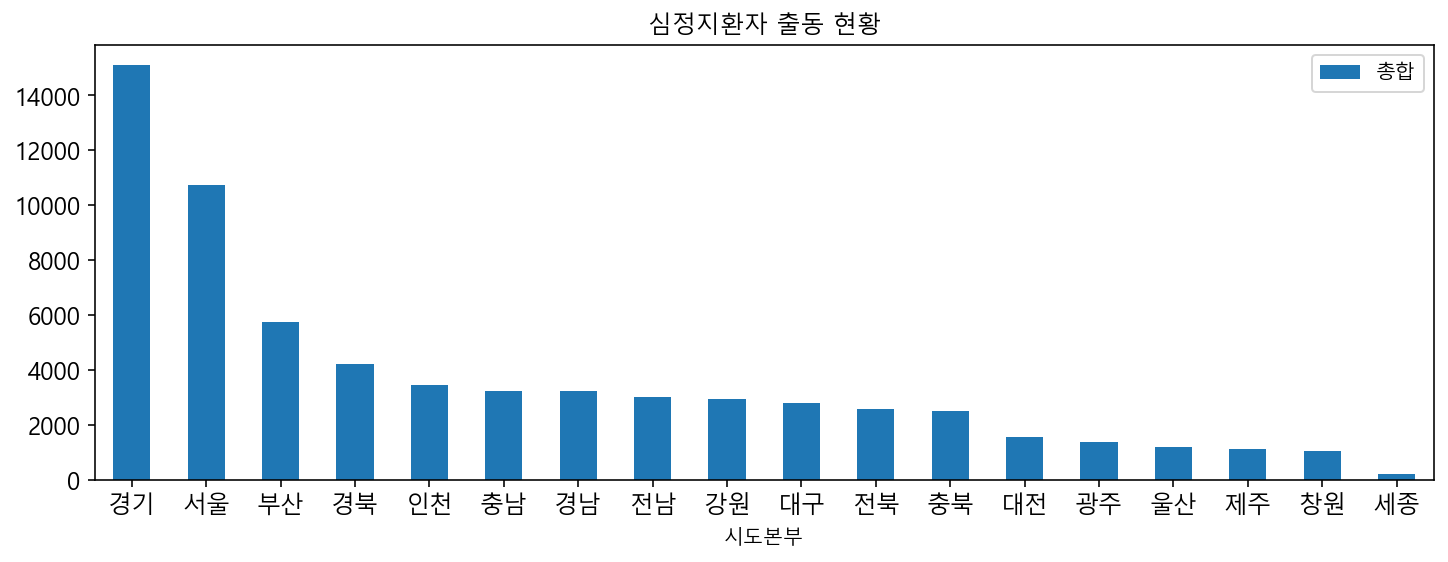

In [6]:
# bar그래프를 이용하여 '심정지환자 출동 현황' 지역별 시각화
df_emergency_sum.plot(kind='bar', title ='심정지환자 출동 현황', figsize=(12,4), legend=True, fontsize=12)
# X축 레이블 기울기 설정
plt.xticks(rotation=0)

위의 그래프를 통해 전국 심정지환자 출동 현황에서 <span style='background-color: #fff5b1'>경기도</span>의 비율이 제일 높고, 그 뒤로 <span style='background-color: #fff5b1'>서울, 부산, 경북</span> 순임을 알 수가 있다. 

위의 순위에 따라 이 프로젝트의 우선순위 지역 범위를 **경기도**로 선정한다.

# 2. 경기도 AED 현황
    현재 경기도 내에 설치되어 있는 AED의 현황을 파악하여 정확도를 높인다.

###### → 심정지환자 출동 현황

## → <span style="background-color:#DAD9FF">자동심장충격기(AED) 현황 정보</span>

###### → 연령별 인구 비율통계

###### → 지역별 사고 비율 통계

In [7]:
# 경기도 자동심장충격기 현황 데이터를 불러오고 변수 df_gyeonggi에 넣은 후 확인
df_gyeonggi = pd.read_csv("경기도 자동제세동기(AED)설치현황.csv", encoding='cp949')
df_gyeonggi

시군명                   설치기관명(설치장소)           전화번호  \
0     가평군           상동리경로당 (상동리 경로당 입구)   031-585-5169   
1     가평군           엄소리경로당 (엄소리 경로당 입구)   031-584-4003   
2     가평군          산유리보건진료소 (보건진료소 진료실)            NaN   
3     가평군        삼회리보건진료소 (보건진료소 건강증진실)   031-584-2242   
4     가평군          개곡리보건진료소 (보건진료소 대기실)   031-582-1191   
...   ...                           ...            ...   
6837  화성시               화성외국인보호소 (1감시실)  031-8055-7023   
6838  화성시        우미린제일풍경채아파트 (관리사무소(안))   031-613-2084   
6839  화성시  안화동마을주공7단지아파트 (관리사무소 1층 출입문)   031-232-7631   
6840  화성시        안화동마을주공9단지아파트 (정문 경비실)   031-223-3072   
6841  화성시   대보유통(주)화성(하)휴게소 (장애인화장실 전면)   031-353-8140   

                       소재지도로명주소                          소재지지번주소    WGS84위도  \
0           경기도 가평군 상면 비룡로 1968      경기도 가평군 상면 상동리 113번지 상동리마을회  37.793053   
1        경기도 가평군 설악면 묵안로 170-46            경기도 가평군 설악면 엄소리 203번지  37.647702   
2        경기도 가평군 가평읍 호반로 1799-8  경기도 가평군 가평읍 산유리 197-8번지 산유보건진료소  37.754059   
3     경기도 가평군 청평면 북한강로2010번길 18  경기도 가평군 청평면 삼회리 226-3번지 삼회보건진료소  37.695551   
4      경기도 가평군 가평읍 당목가일길 211-80    경기도 가평군 가평읍 개곡리 705번지 개곡보건진료소  37.870567   
...                         ...                              ...        ...   
6837                        NaN                  경기도 화성시 마도면 석교리        NaN   
6838                        NaN  경기도 화성시 석우동 53번지 동탄예당마을우미린제일풍경채  37.212526   
6839                        NaN     경기도 화성시 병점동 849번지 안화동마을주공7단지  37.213612   
6840                        NaN     경기도 화성시 병점동 819번지 안화동마을주공9단지  37.213651   
6841                        NaN                              NaN        NaN   

         WGS84경도  
0     127.323019  
1     127.496837  
2     127.511749  
3     127.393533  
4     127.537669  
...          ...  
6837         NaN  
6838  127.076425  
6839  127.048231  
6840  127.044354  
6841         NaN  

[6842 rows x 7 columns]

In [8]:
# info() 사용하여 결측치 확인
df_gyeonggi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6842 entries, 0 to 6841
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군명          6842 non-null   object 
 1   설치기관명(설치장소)  6842 non-null   object 
 2   전화번호         6681 non-null   object 
 3   소재지도로명주소     3531 non-null   object 
 4   소재지지번주소      6807 non-null   object 
 5   WGS84위도      6800 non-null   float64
 6   WGS84경도      6800 non-null   float64
dtypes: float64(2), object(5)
memory usage: 374.3+ KB


In [9]:
# 경기도 AED 결측치 개수를 df_gyeonggi_sum 변수에 넣어서 확인
df_gyeonggi_sum = df_gyeonggi.isnull().sum()
df_gyeonggi_sum

시군명               0
설치기관명(설치장소)       0
전화번호            161
소재지도로명주소       3311
소재지지번주소          35
WGS84위도          42
WGS84경도          42
dtype: int64

이 과정에서 필요한 '시군명' 컬럼의 결측치가 0이기 때문에 결측치 제거 과정을 생략함.

In [10]:
# 경기도 내 AED 설치 순위를 알아보기 위해 우선 컬럼 확인
df_gyeonggi.columns

Index(['시군명', '설치기관명(설치장소)', '전화번호', '소재지도로명주소', '소재지지번주소', 'WGS84위도',
       'WGS84경도'],
      dtype='object')

<AxesSubplot:title={'center':'시군별 AED 설치 현황'}>

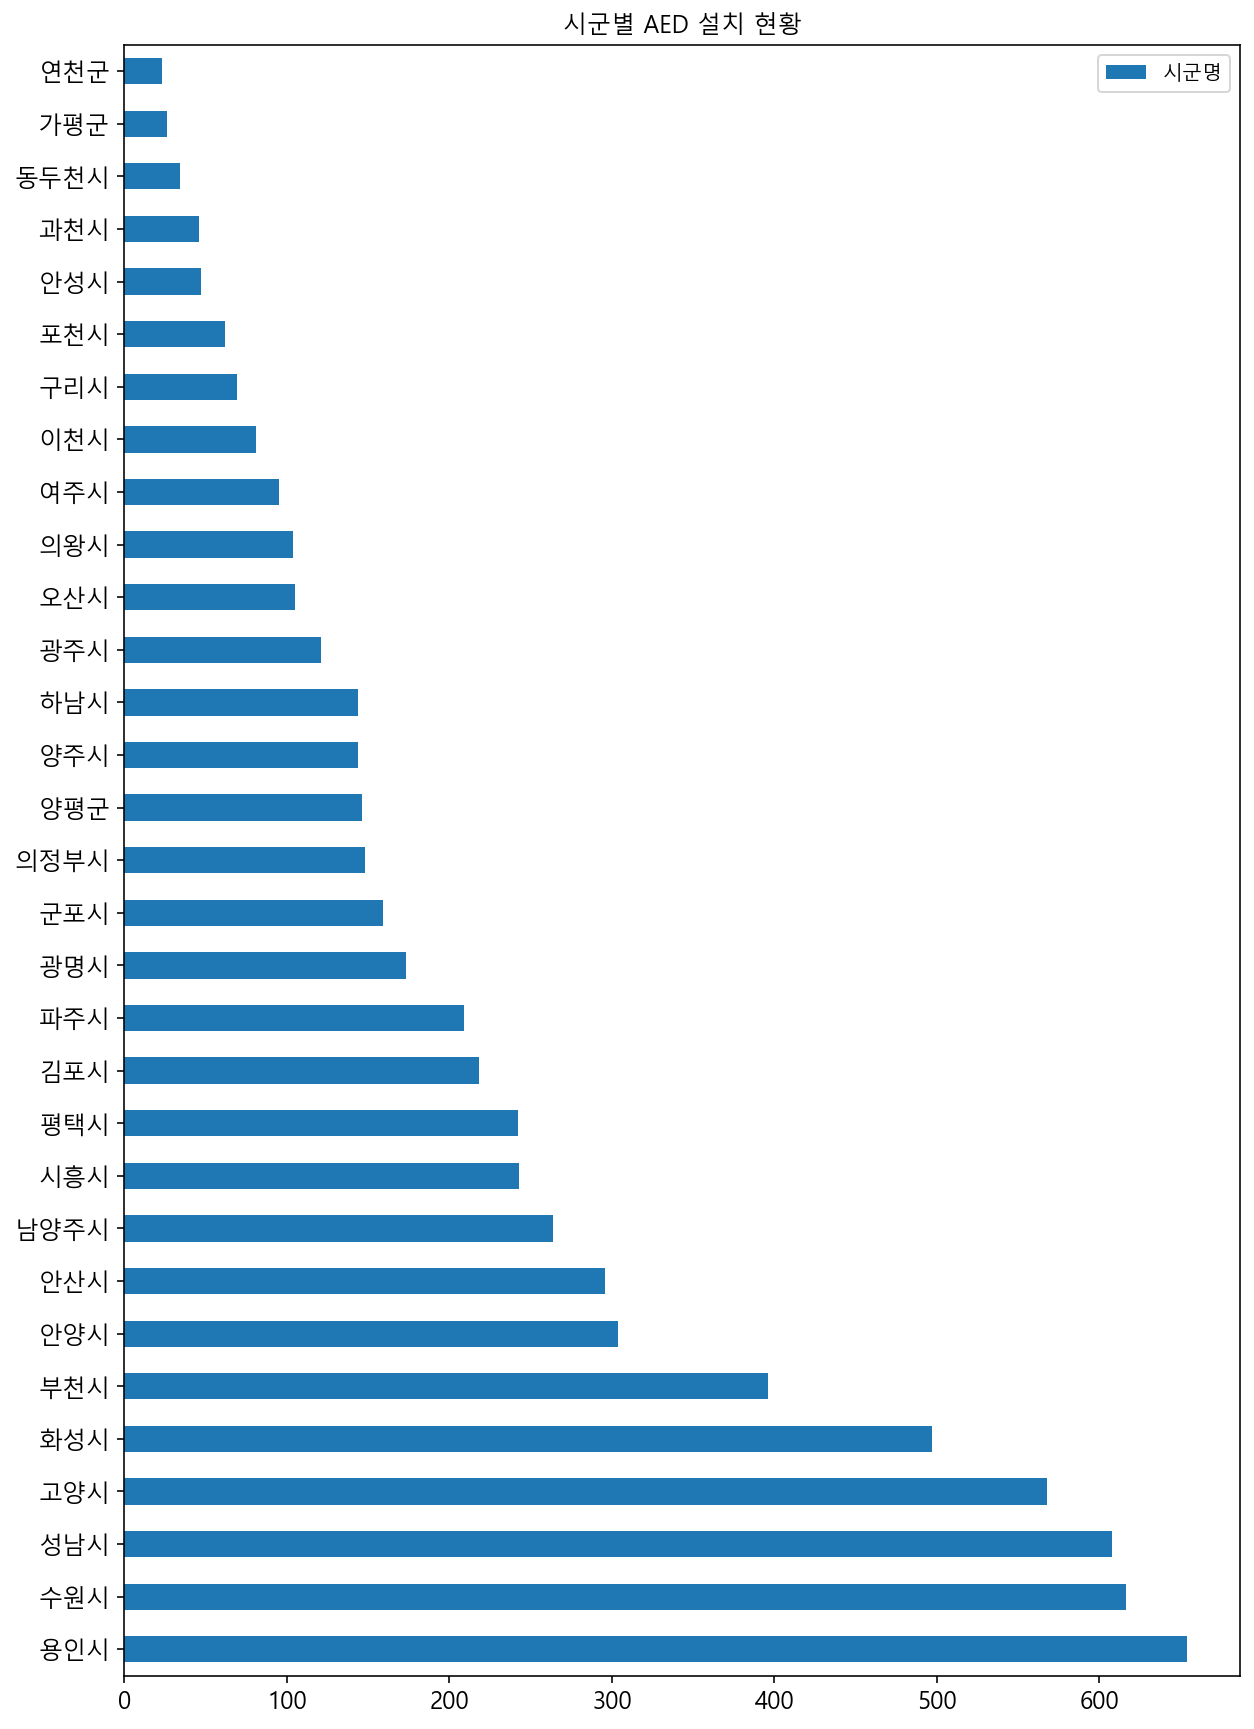

In [11]:
# 시군명 컬럼 확인 후, 중복 컬럼 개수를 세기 위해 df_gyeonggi_count 변수로 넣음.
df_gyeonggi_count = df_gyeonggi["시군명"]

# value_counts()를 사용하여 중복 컬럼 개수를 표시하여 AED 시군별 설치 개수를 내림차순으로 현황 확인
df_gyeonggi_count_top = df_gyeonggi_count.value_counts()
# 시각화를 위해 df_gyeonggi_count_top 변수에 넣음

# bar 그래프를 사용하여 '시군별 AED 설치 현황' 시각화
df_gyeonggi_count_top.plot(kind='barh', title ='시군별 AED 설치 현황', figsize=(10,15), legend=True, fontsize=12)

위의 시각화를 통해 <span style='background-color: #fff5b1'>용인시, 수원시, 성남시, 고양시, 화성시, 부천시</span> 순으로 AED 설치 비중이 높은 것으로 나타남.

지역별 AED 설치 분포도를 더 정확하게 확인하기 위해 bar 그래프 뿐만이 아니라 산점도를 이용해 시각화함.

<AxesSubplot:xlabel='WGS84경도', ylabel='WGS84위도'>

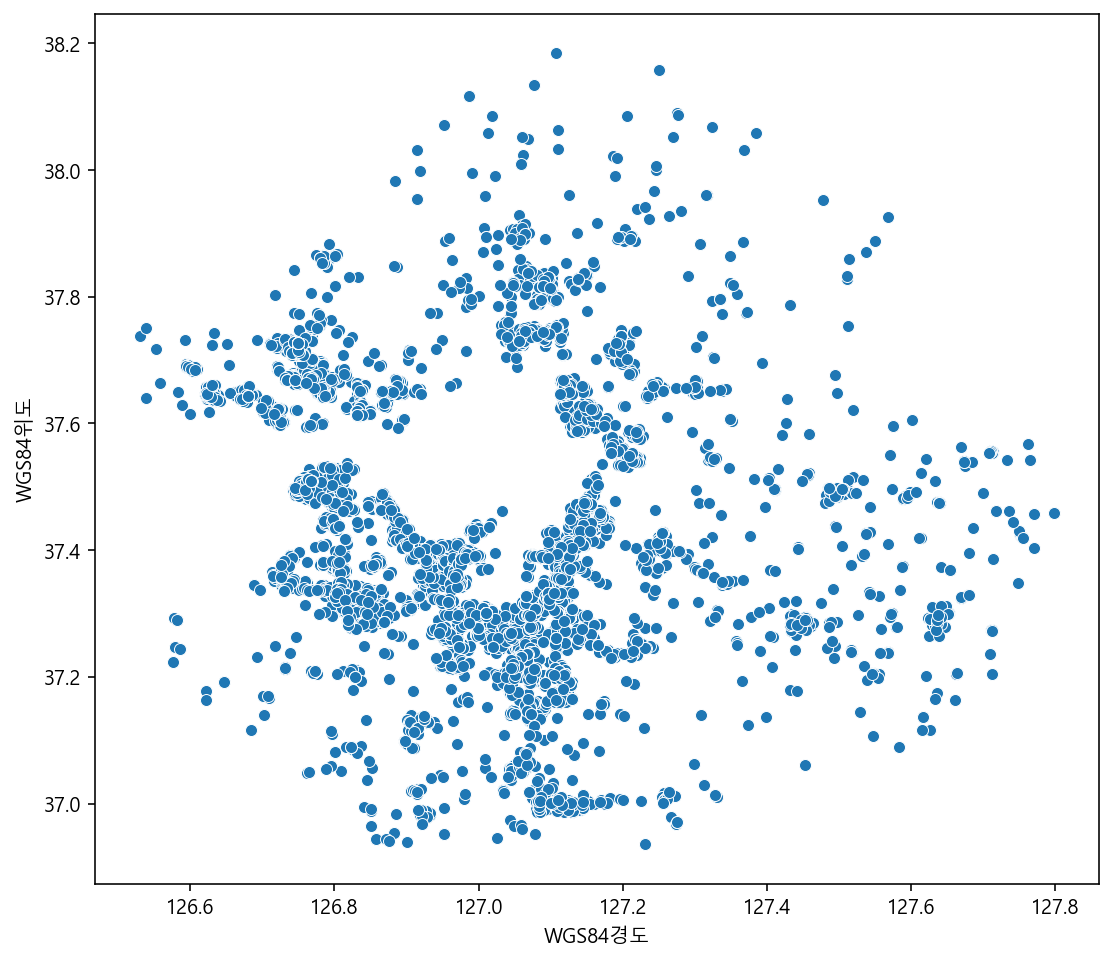

In [12]:
# 경기도 AED 분포 산점도 시각화
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_gyeonggi, x="WGS84경도", y="WGS84위도")

AED 설치 비율이 일정 지역에 몰려있는 것을 확인할 수 있음.

# 3. 경기도 주민등록상 인구 / 노인인구 통계
    경기도 인구 통계를 통해 총 인구수와 노인 인구수, 노인 비율이 높은 지역을 구한다.

###### → 심정지환자 출동 현황

###### → 자동심장충격기(AED) 현황 정보

## → <span style="background-color:#DAD9FF">연령별 인구 비율통계</span>

###### → 지역별 사고 비율 통계

###### → 시군별 유동인구

In [13]:
# '경기도 및 전국 노인인구' 데이터 불러온 후, df_local 변수에 넣음.
df_local = pd.read_csv("2022년 8월 경기도 및 전국 노인인구.csv", encoding='cp949',thousands=',')
df_local

2022년 8월 경기도 노인인구  Unnamed: 1  Unnamed: 2  \
0                                            NaN         NaN         NaN   
1   * 경기도 100세 이상 노인 : 1889명 (남: 404명, 여: 1485명)         NaN         NaN   
2                                            NaN         NaN         NaN   
3                                (2022. 8월 말 기준)         NaN         NaN   
4                                             구분  경 기 도  인 구         NaN   
5                                            NaN           계           남   
6                                           총  계  13,590,056   6,840,757   
7                                             남부  10,047,249   5,076,916   
8                                            수원시   1,186,961     597,881   
9                                            성남시     924,333     457,808   
10                                           부천시     796,575     394,605   
11                                           용인시   1,078,751     535,640   
12                                           안산시     647,266     331,906   
13                                           안양시     548,938     271,203   
14                                           평택시     575,007     300,748   
15                                           시흥시     513,331     268,101   
16                                           화성시     899,334     467,557   
17                                           광명시     289,887     142,737   
18                                           군포시     267,651     132,817   
19                                           광주시     391,131     199,571   
20                                           김포시     484,310     242,154   
21                                           이천시     224,616     116,895   
22                                           안성시     190,126      98,161   
23                                           오산시     230,142     119,699   
24                                           하남시     323,472     161,608   
25                                           의왕시     161,047      79,909   
26                                           여주시     112,800      57,360   
27                                           양평군     122,914      61,890   
28                                           과천시      78,657      38,666   
29                                            북부   3,542,807   1,763,841   
30                                           고양시   1,077,198     526,156   
31                                          남양주시     737,059     366,331   
32                                          의정부시     464,310     228,406   
33                                           파주시     490,143     248,876   
34                                           구리시     189,960      94,045   
35                                           양주시     238,734     120,947   
36                                           포천시     147,735      78,294   
37                                          동두천시      92,744      46,252   
38                                           가평군      62,382      32,191   
39                                           연천군      42,542      22,343   
40                                           NaN         NaN         NaN   
41                                        ※전국 통계  51,558,441  25,699,579   

    Unnamed: 3       Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0          NaN              NaN        NaN        NaN        NaN        NaN   
1          NaN              NaN        NaN        NaN        NaN        NaN   
2          NaN              NaN        NaN        NaN        NaN        NaN   
3          NaN              NaN        NaN        NaN        NaN        NaN   
4          NaN  경기도 65세이상 노인 인구        NaN        NaN     비율 (%)        NaN   
5            여                계          남          여          계          남   
6    6,749,299        1,958,268    872,734  1,085,534      14.41      12.76   
7    4,970,333        1,384,303    619,814    764,489      13.78      12.21   
8      589,080          144,215     63,220     80,9

이때, 뒤에 사용할 plt 시각화를 위해 컬럼의 콤마(,)를 제거하는 과정이 필요함.

In [14]:
# 시각화 plt 사용을 위해'Unnamed: 1' 컬럼 콤마(,) 제거
df_local['Unnamed: 1']=df_local['Unnamed: 1'].str.replace(',','').copy()

In [15]:
# 시각화 plt 사용을 위해 'Unnamed: 4' 컬럼 콤마(,) 제거
df_local['Unnamed: 4']=df_local['Unnamed: 4'].str.replace(',','').copy()

In [16]:
# 시각화 plt 사용을 위해 'Unnamed: 7' 컬럼 콤마(,) 제거
df_local['Unnamed: 7']=df_local['Unnamed: 7'].str.replace(',','').copy()

In [17]:
# 콤마(,)를 제거한 df_local을 새 변수 df_local_copy에 넣음
df_local_copy = df_local
# 필요없는 행 삭제하여 컬럼 정리
new_df_local = df_local_copy.drop([0,1,2,3,4,5,6,40,41])

# 보기 쉽게 rename을 사용해 컬럼명 변경한 후, new_new_df_local 변수에 넣음
new_new_df_local = new_df_local.rename(columns={'2022년 8월 경기도 노인인구':'시군별','Unnamed: 1':'경기도 총 인구수','Unnamed: 4':'65세 이상 노인 인구수','Unnamed: 7':'비율(%)'})
# '경기도 총 인구수'와 '65세 이상 노인 인구수','비율' 컬럼을 추출함.
bar_new_new_df_local= new_new_df_local[['시군별','경기도 총 인구수','65세 이상 노인 인구수','비율(%)']]
# '시군별' 컬럼을 index로 부여
bar_new_new_df_local.set_index('시군별', inplace=True)
bar_new_new_df_local

경기도 총 인구수 65세 이상 노인 인구수  비율(%)
시군별                                
남부    10047249       1384303  13.78
수원시    1186961        144215  12.15
성남시     924333        142893  15.46
부천시     796575        123829  15.55
용인시    1078751        154950  14.36
안산시     647266         80081  12.37
안양시     548938         82841  15.09
평택시     575007         72460   12.6
시흥시     513331         53523  10.43
화성시     899334         86935   9.67
광명시     289887         44524  15.36
군포시     267651         39980  14.94
광주시     391131         58090  14.85
김포시     484310         65596  13.54
이천시     224616         34188  15.22
안성시     190126         35685  18.77
오산시     230142         24759  10.76
하남시     323472         43593  13.48
의왕시     161047         24428  15.17
여주시     112800         26839  23.79
양평군     122914         33727  27.44
과천시      78657         11167   14.2
북부     3542807        573965   16.2
고양시    1077198        160146  14.87
남양주시    737059        112883  15.32
의정부시    464310         76572  16.49
파주시     490143         72141  14.72
구리시     189960         28855  15.19
양주시     238734         40870  17.12
포천시     147735         32336  21.89
동두천시     92744         20358  21.95
가평군      62382         17593   28.2
연천군      42542         12211   28.7

필요한 데이터가 시군별 <span style='background-color: #fff5b1'>총 인구수</span>와 <span style='background-color: #fff5b1'>노인 인구수, 비율 (%)</span>이므로 관련 열 추출 과정이 필요함.

In [18]:
# 데이터 타입 확인
bar_new_new_df_local.dtypes

경기도 총 인구수        object
65세 이상 노인 인구수    object
비율(%)            object
dtype: object

object 형태는 시각화 할 수 없으므로 int(정수형),float(실수형) 변환이 필요함.

In [19]:
# 시각화를 위해 object 형식인 컬럼들을 int(정수형),float(실수형)으로 변환
bar_new_new_df_local_int = bar_new_new_df_local.astype({'경기도 총 인구수':int,
                                                       '65세 이상 노인 인구수':int,
                                                       '비율(%)':float})
# 컬럼 int(정수형),float(실수형) 변환 확인
bar_new_new_df_local_int.dtypes

경기도 총 인구수          int32
65세 이상 노인 인구수      int32
비율(%)            float64
dtype: object

In [20]:
# 경기도 인구 수 컬럼을 내림차순 정렬 후, local_count_population_top 변수에 넣음
local_count_population_top = bar_new_new_df_local_int.sort_values(by='경기도 총 인구수',ascending = False)
# '경기도 총 인구수' 컬럼만 추출 
population_top_10 = local_count_population_top[['경기도 총 인구수']]
# 경기도 내 총 인구수 상위 5개 지역 도출
local_pop_5 = population_top_10.head(5)

In [21]:
# 시군별 65세 이상 노인수 컬럼을 내림차순 정렬 후, local_count_old_top 변수에 넣음
local_count_old_top = bar_new_new_df_local_int.sort_values(by='65세 이상 노인 인구수',ascending = False)
# '65세 이상 노인 인구수' 컬럼만 추출
local_old_top_10 = local_count_old_top[['65세 이상 노인 인구수']]
# 경기도 내 노인 수 상위 5개 지역 도출
local_old_5 = local_old_top_10.head(5)

In [22]:
# 시군별 노인 비율 컬럼을 내림차순 정렬 후, local_count_old_per_top 변수에 넣음
local_count_old_per_top = bar_new_new_df_local_int.sort_values(by='비율(%)',ascending = False)
# '비율(%)' 컬럼만 추출
local_per_top_10 = local_count_old_per_top[['비율(%)']]
# 경기도 내 노인 비율 상위 5개 지역 도출
local_old_per_5 = local_per_top_10.head(5)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '연천군'),
  Text(1, 0, '가평군'),
  Text(2, 0, '양평군'),
  Text(3, 0, '여주시'),
  Text(4, 0, '동두천시')])

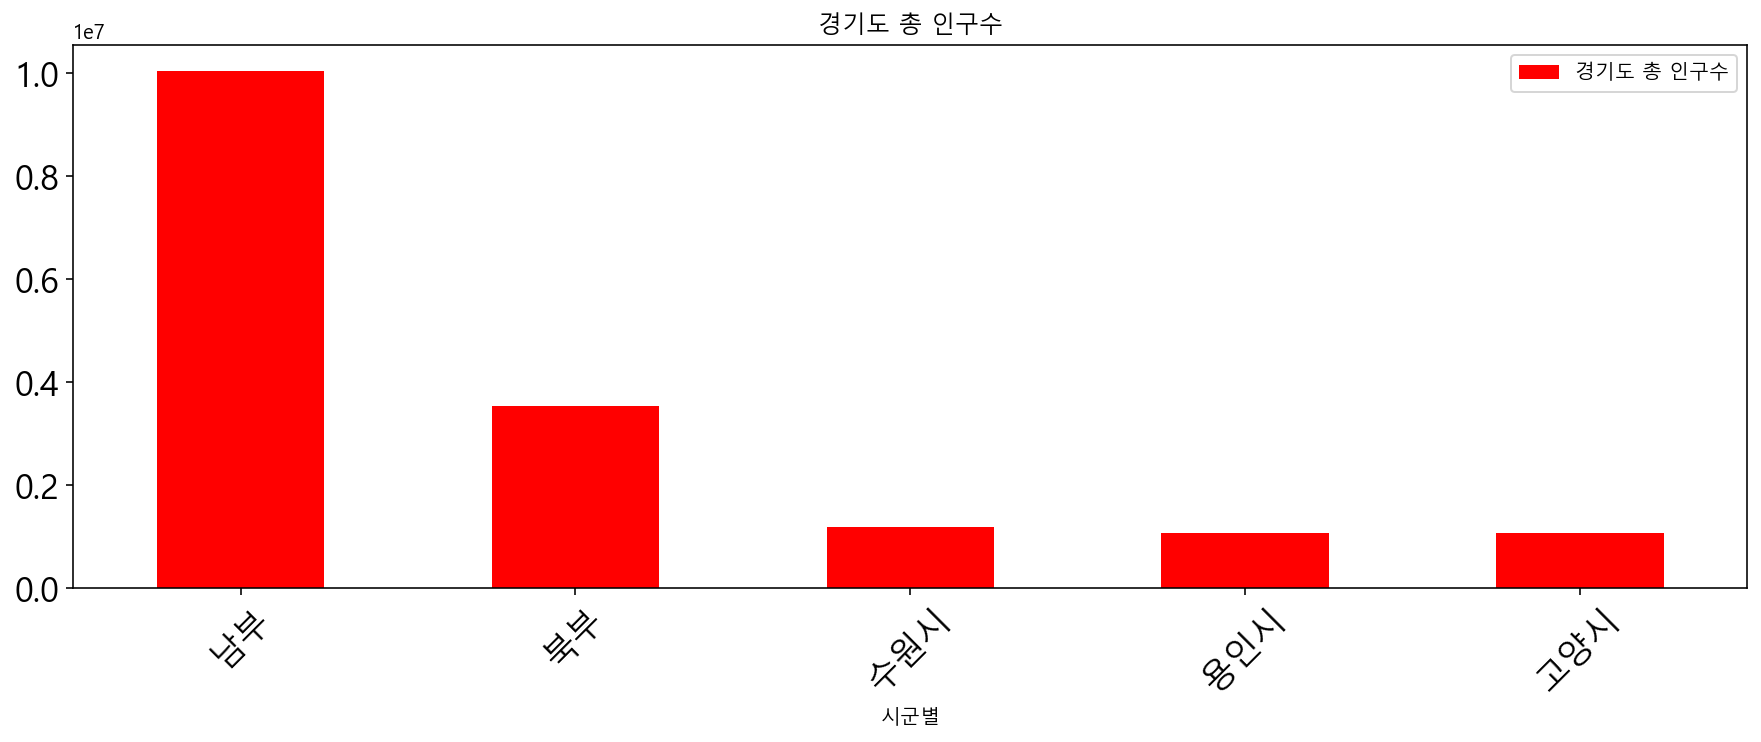

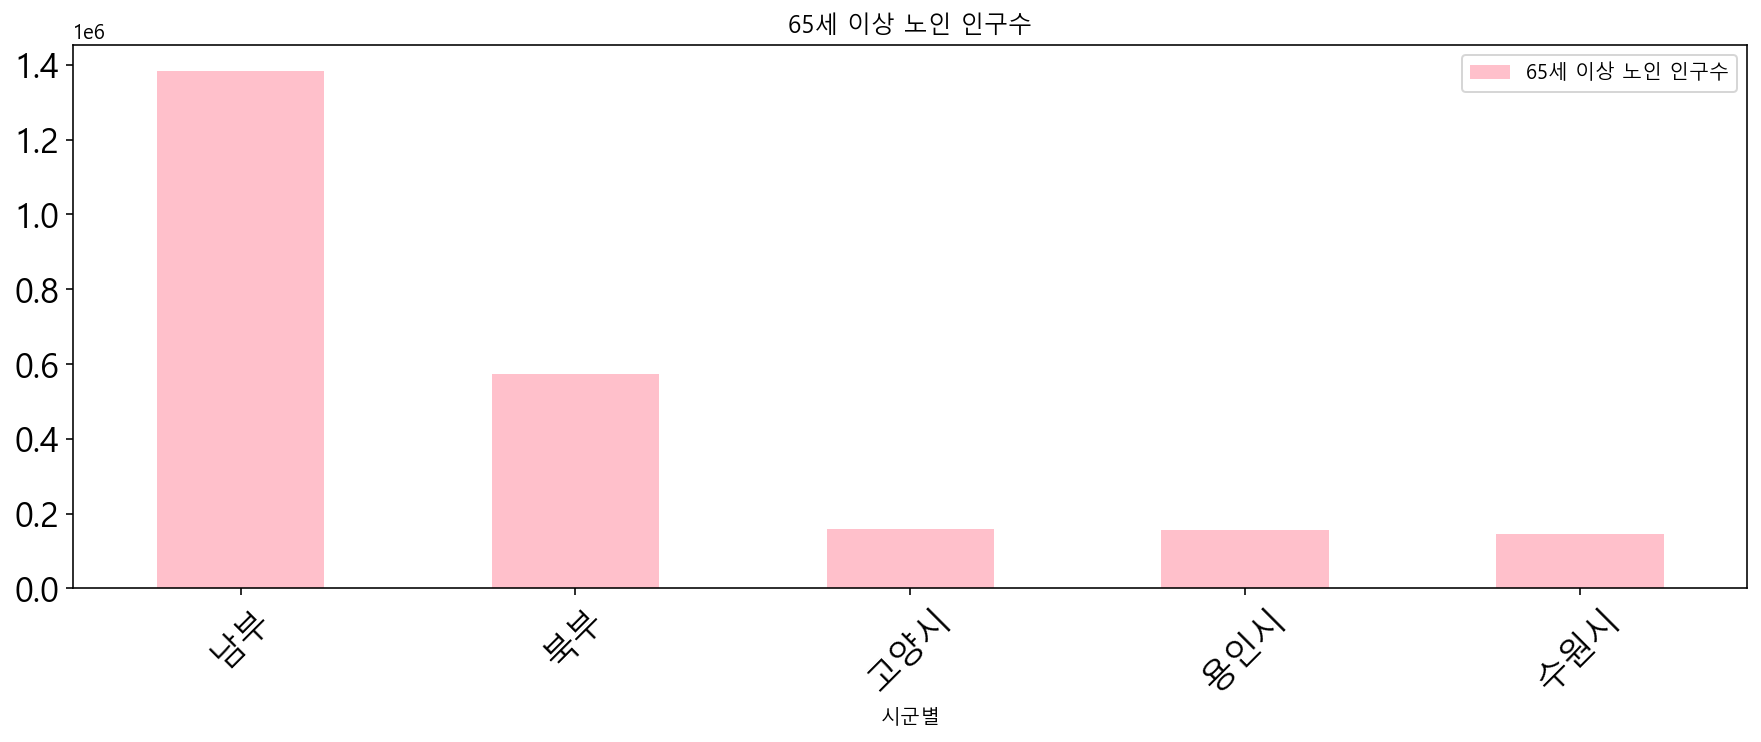

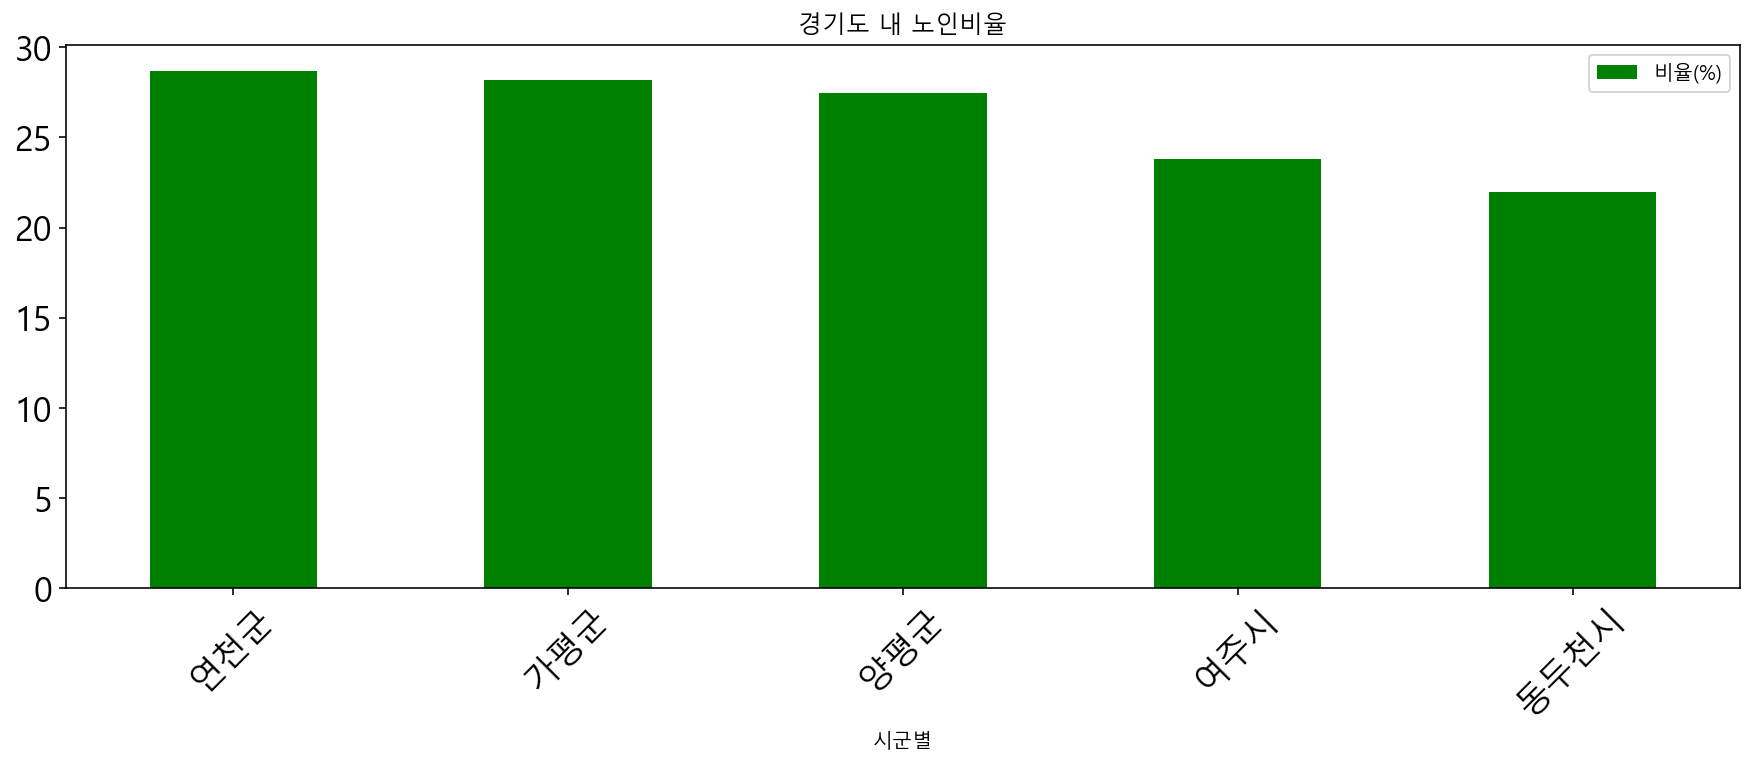

In [23]:
# plot를 사용하여 '경기도 총 인구수'와 '경기도 시군별 노인수', 경기도 내 노인비율'을 시각화
local_pop_5.plot(kind='bar', color='red',  title ='경기도 총 인구수', figsize=(15,5), legend=True, fontsize=17)
plt.xticks(rotation=45)

local_old_5.plot(kind='bar',color='pink',  title ='65세 이상 노인 인구수', figsize=(15,5), legend=True, fontsize=17)
plt.xticks(rotation=45)

local_old_per_5.plot(kind='bar',color='green',  title ='경기도 내 노인비율', figsize=(15,5), legend=True, fontsize=17)
plt.xticks(rotation=45)

위의 그래프를 통해 경기도 인구수는 <span style='background-color: #fff5b1'>남부, 북부</span> 순으로 많고, 65세 이상 노인 인구수는 <span style='background-color: #fff5b1'>남부, 북부</span> 순으로 많다. 그리고 노인비율은 <span style='background-color: #fff5b1'>연천군, 가평군</span> 순으로 많음을 확인 할 수 있다.

# 4. 지역별 사고 비율 통계
    경기도 사고 데이터를 분석하여 사고위험이 높은 지역을 도출한다.

###### → 심정지환자 출동 현황

###### → 자동심장충격기(AED) 현황 정보

######  → 연령별 인구 비율통계

## → <span style="background-color:#DAD9FF">지역별 사고 비율 통계</span>

###### → 시군별 유동인구

In [24]:
# 시군구별 교통사고 데이터 불러오기
local_accident = pd.read_csv("2021년도 시군구별 교통사고.csv", encoding='cp949', thousands=',')
local_accident

2021년도 시군구별 교통사고 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0                NaN        NaN        NaN        NaN        NaN
1                 시도        시군구    사고건수(건)    사망자수(명)    부상자수(명)
2                 전국         합계    203,130      2,916    291,608
3                 서울         합계     33,913        243     45,223
4                 서울        종로구        778          6      1,050
..               ...        ...        ...        ...        ...
244               울산         동구        467          2        610
245               울산         북구        786          8      1,149
246               울산        울주군        731         18      1,044
247               세종         합계        788         16      1,031
248               세종        세종시        788         16      1,031

[249 rows x 5 columns]

In [25]:
# local_accident 데이터 타입 확인. 형식 변환이 필요.
local_accident.dtypes

2021년도 시군구별 교통사고    object
Unnamed: 1          object
Unnamed: 2          object
Unnamed: 3          object
Unnamed: 4          object
dtype: object

In [26]:
# 결측치 확인
local_accident.isnull().sum()

2021년도 시군구별 교통사고    1
Unnamed: 1          1
Unnamed: 2          1
Unnamed: 3          1
Unnamed: 4          1
dtype: int64

In [27]:
# 시각화를 위해 콤마(,) 제거
local_accident['Unnamed: 1']=local_accident['Unnamed: 1'].str.replace(',','').copy()
local_accident['Unnamed: 2']=local_accident['Unnamed: 2'].str.replace(',','').copy()

# 결측치, 필요없는 행 제거
df_local_accident = local_accident.drop([0,1,2]) 
df_local_accident

# '2021년도 시군구별 교통사고', '시군구','사고건수(건)' 컬럼 추출
df_local_accident_col = df_local_accident[['2021년도 시군구별 교통사고','Unnamed: 1','Unnamed: 2']]

# 시각화를 위해 object 형식인 컬럼들을 int(정수형),float(실수형)으로 변환
local_accident_int = df_local_accident_col.astype({'Unnamed: 2':int}).copy()

# indxe를 '2021년도 시군구별 교통사고' 컬럼으로 지정
local_accident_int.set_index('2021년도 시군구별 교통사고' ,inplace=True)

# rename 사용하여 컬럼명 변경
local_accident_int.rename(columns={'Unnamed: 1':'시군구','Unnamed: 2':'사고건수(건)'}, inplace=True)

# '합계' 문자열 포함하는 행 제거
# mask에 '시군구'컬럼의 '합계' 문자열을 포함한 값을 선택하게 함.
mask = local_accident_int['시군구'].isin(['합계'])
# mask 제외 영역 보기
local_accident_int[~mask]
# local_accident_mask 객체에 다시 저장
local_accident_mask = local_accident_int[~mask]
# '서울'만 추출한 시군구별 교통사고 데이터를 변수에 저장

# groupby 사용하여 시군구별 교통사고 합계
gr_accident = local_accident_mask.groupby('2021년도 시군구별 교통사고').sum().sort_values(by='사고건수(건)', ascending=False)
# 전국 교통사고 통계 상위 지역 5위 추출
gr_accident_top = gr_accident.head(5)
gr_accident_top

사고건수(건)
2021년도 시군구별 교통사고         
경기                  53332
서울                  33913
대구                  12133
경북                  12100
부산                  11339

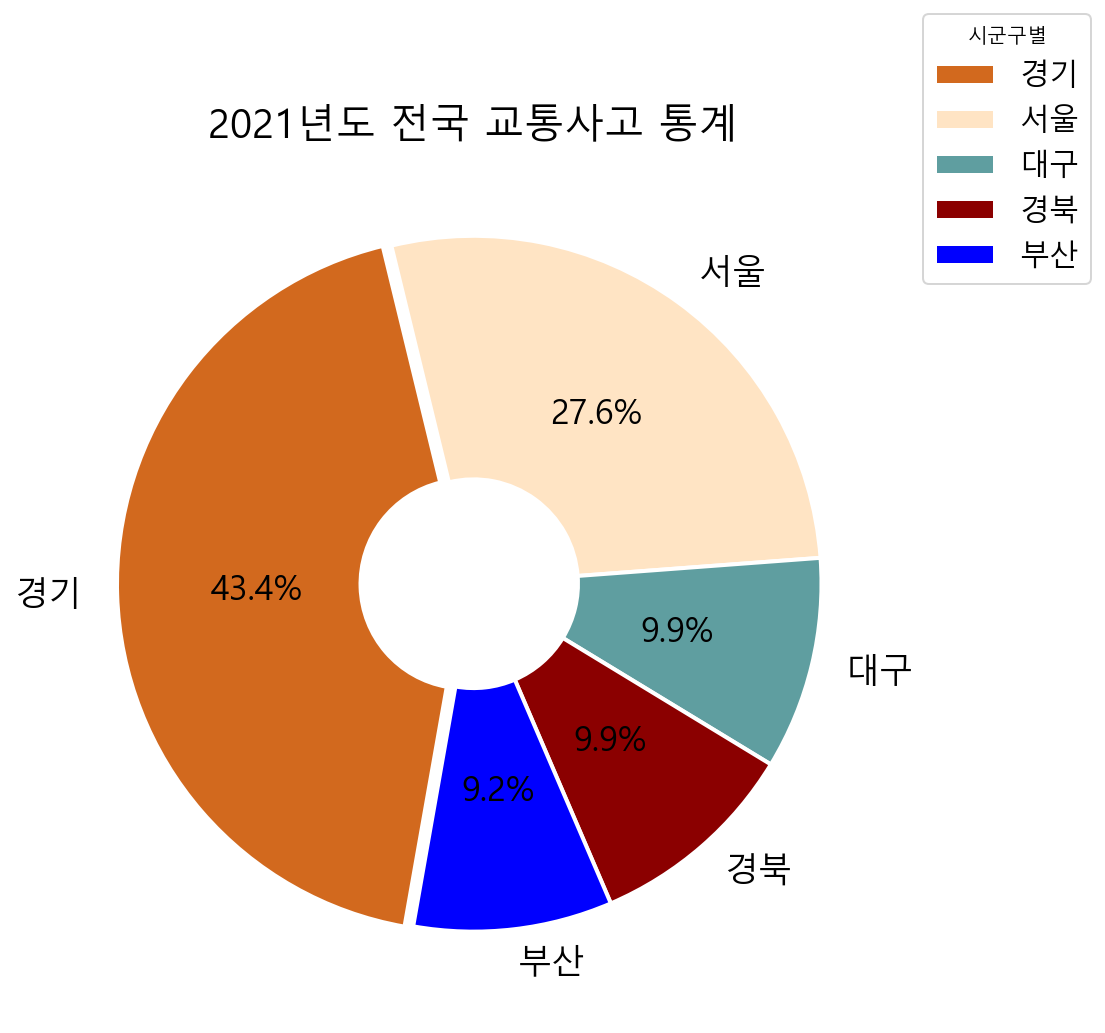

In [28]:
# 2021년 시군구별 교통사고 합계 데이터를 pie chart로 시각화
labels = gr_accident_top.index
accident = gr_accident_top['사고건수(건)']

# explode로 pie chart 중심 조각 갈라지는 것 표현
explode = (0.025, 0, 0, 0, 0) 

# 각 영역의 색상 지정
colors=['chocolate','bisque','cadetblue','darkred','b']
# 부채꼴 스타일 지정 {부채꼴 영역의 너비(반지름 비율), 테두리 색상, 테두리 선의 너비}
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

# pie chart로 데이터 시각화
# chart 크기 설정
plt.figure(figsize=(10,8))
# accident 데이터를 autopct로 소수점 한자리까지 표시, 시계방향 부채꼴 표시, startangle로 부채꼴 각도 설정, 글자 크기 변경
pie = plt.pie(accident, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, counterclock=False, startangle=260, wedgeprops=wedgeprops, textprops = {'fontsize':17})
plt.title('2021년도 전국 교통사고 통계', size=20)
# 범례 위치 설정
plt.legend(loc='center left',bbox_to_anchor=(1, 1), title='시군구별', fontsize=15)

전국 교통사고 통계에서 <span style="color: red">43.4%</span>로 <span style='background-color: #fff5b1'>경기도</span>가 높은 사고 비율을 가졌음을 확인할 수 있다.



In [29]:
# 경기도 시군구별 교통사고 순위 도출
# 원본 변형을 피하기 위해 copy를 사용하여 새로운 df_ac_copy 생성
df_ac_copy = df_local_accident_col.copy()

# '경기'를 포함한 컬럼 값만 추출
find_gg = df_ac_copy[df_ac_copy['2021년도 시군구별 교통사고'].str.contains('경기', na=False)]

# 필요없는 '합계' 행 삭제
find_gg_dr = find_gg.drop(index=46,axis=0)

# 컬럼명 변경
find_gg_name = find_gg_dr.rename(columns={'Unnamed: 1': '시군구','Unnamed: 2': '사고건수(건)'})

# 컬럼 index 변경
find_gg_in = find_gg_name.set_index('2021년도 시군구별 교통사고')

# 컬럼 인덱스 변경2
# 후에 사용할 join을 위해 index를 '시군구'로 변경함
find_gg_in2 =find_gg_in.set_index('시군구')

# int 변환 후, 상위 5순위 지역 도출
find_gg_int = find_gg_in2.astype({'사고건수(건)':int}).copy()
gg_ac_top = find_gg_int.sort_values('사고건수(건)', ascending=False)
gg_ac_5 = gg_ac_top.head()
gg_ac_5

사고건수(건)
시군구         
수원시     4615
안산시     3821
용인시     3603
고양시     3532
부천시     3436

In [30]:
# 원본의 index를 컬럼으로 만들고 index를 생성함.
gg_bar_index = gg_ac_5.reset_index(drop=False, inplace=True)
gg_bar_index                   

<AxesSubplot:xlabel='시군구', ylabel='사고건수(건)'>

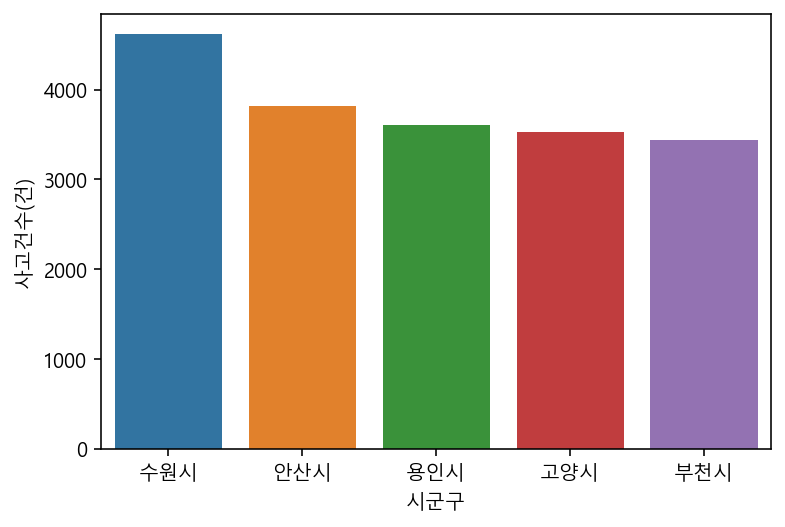

In [31]:
sns.barplot(data=gg_ac_5,x='시군구', y='사고건수(건)')

경기도 내 교통사고 비율은 <span style='background-color: #fff5b1'>수원시</span>가 가장 높은 것을 확인할 수 있다.

# 5. 시군별 유동인구
    시군별 유동인구 데이터를 분석하여 인구밀집도가 높은 지역 순위를 분석한다.

###### → 심정지환자 출동 현황

###### → 자동심장충격기(AED) 현황 정보

######  → 연령별 인구 비율통계

###### → 지역별 사고 비율 통계

## → <span style="background-color:#DAD9FF">시군별 유동인구</span>

In [32]:
# '시군별 유동인구' 데이터 불러오기
foot_traffic = pd.read_csv("시군별유동인구데이터.csv", encoding='cp949',thousands=',')
foot_traffic

년월  출발지(야간체류지) 시군코드     출발지역명  도착지 시군코드    도착지역명  10대남성 유입인구  \
0      2020-05            41800   경기도 연천군     41650  경기도 포천시       25.52   
1      2020-05            41800   경기도 연천군     41670  경기도 여주시        0.41   
2      2020-05            41800   경기도 연천군     41800  경기도 연천군     3564.03   
3      2020-05            41800   경기도 연천군     41820  경기도 가평군        8.26   
4      2020-05            41800   경기도 연천군     41830  경기도 양평군        1.49   
...        ...              ...       ...       ...      ...         ...   
85099  2020-12            29155  광주광역시 남구     41820  경기도 가평군        0.12   
85100  2020-12            29155  광주광역시 남구     41830  경기도 양평군        0.38   
85101  2020-12            29170  광주광역시 북구     41110  경기도 수원시        6.97   
85102  2020-12            29170  광주광역시 북구     41130  경기도 성남시       13.45   
85103  2020-12            28140  인천광역시 동구     41550  경기도 안성시        0.53   

       20대남성 유입인구  30대남성 유입인구  40대남성 유입인구  50대남성 유입인구  60대남성 유입인구  70대남성 유입인구  \
0          160.86      159.36      183.37      190.11       88.91       41.85   
1            1.61        3.44        4.60        2.48        3.66        0.33   
2         6556.64     2497.54     3099.81     3834.56     2683.64     2605.96   
3            7.71        8.16        9.12        9.55        9.43        1.78   
4            4.22        3.65        4.56        5.83        3.51        0.54   
...           ...         ...         ...         ...         ...         ...   
85099        0.83        0.54        0.16        0.71        0.50        0.22   
85100        0.82        0.45        0.66        0.25        0.92        0.07   
85101       35.91       27.35       21.80       22.02        9.26        2.42   
85102       27.70       24.01       24.48       28.95        8.63        4.57   
85103        1.47        5.33        6.48        6.04        4.36        0.39   

       10대여성 유입인구  20대여성 유입인구  30대여성 유입인구  40대여성 유입인구  50대여성 유입인구  60대여성 유입인구  \
0           42.21       33.41       71.09       75.32      114.07       54.07   
1            0.68        0.47        2.44        0.58        1.50        1.41   
2         3188.24     1732.18     2045.59     2540.40     3584.51     2770.54   
3            3.99        3.99        4.80        5.43        5.63        2.33   
4            1.93        0.44        1.97        1.16        4.54        1.19   
...           ...         ...         ...         ...         ...         ...   
85099        0.62        1.05        0.90        0.69        0.18        0.32   
85100        0.00        1.18        0.00        0.20        0.16        0.56   
85101       10.00       22.55       14.96        7.48       15.39        9.21   
85102        8.87       21.94       11.87       12.69       15.28        7.72   
85103        1.07        0.52        0.39        0.76        3.43        0.96   

       70대여성 유입인구  
0           45.27  
1            0.48  
2         3929.34  
3            3.17  
4            0.53  
...           ...  
85099        0.21  
85100        0.25  
85101        5.09  
85102        8.06  
85103        0.07  

[85104 rows x 19 columns]

In [33]:
# 결측치 확인
foot_traffic.isnull().sum()

년월                 0
출발지(야간체류지) 시군코드    0
출발지역명              0
도착지 시군코드           0
도착지역명              0
10대남성 유입인구         0
20대남성 유입인구         0
30대남성 유입인구         0
40대남성 유입인구         0
50대남성 유입인구         0
60대남성 유입인구         0
70대남성 유입인구         0
10대여성 유입인구         0
20대여성 유입인구         0
30대여성 유입인구         0
40대여성 유입인구         0
50대여성 유입인구         0
60대여성 유입인구         0
70대여성 유입인구         0
dtype: int64

In [34]:
# 필요없는 컬럼 제거
df_foot = foot_traffic.drop(['년월','출발지(야간체류지) 시군코드','도착지 시군코드','도착지역명'],axis=1)

# rename 메서드 이용하여 컬럼명 변경 후, set_index로 index 변경
df_foot_re = df_foot.rename(columns={'출발지역명':'시군구'}).set_index('시군구')

# groupby로 동일 컬럼별 유동인구 합산값 계산
df_foot_gr = df_foot_re.groupby('시군구').sum()

# 동일한 index 행값 계산
foot_sum = df_foot_gr.sum(axis=1)

# Series를 Dataframe으로 변환
df1 = pd.DataFrame(foot_sum)
# 컬럼명 변경 '유동인구수'로 변경
df_foot_sum = df1.rename(columns={0:'유동인구수'})
# 내림차순 후, 경기도 내 유동인구 상위 5위 지역 추출
foot_top = df_foot_sum.sort_values(by='유동인구수', ascending=False).head()
foot_top

유동인구수
시군구                 
경기도 수원시  17253480.84
경기도 용인시  13824086.00
경기도 성남시  13215839.93
경기도 고양시  13029913.27
경기도 부천시  10878696.30

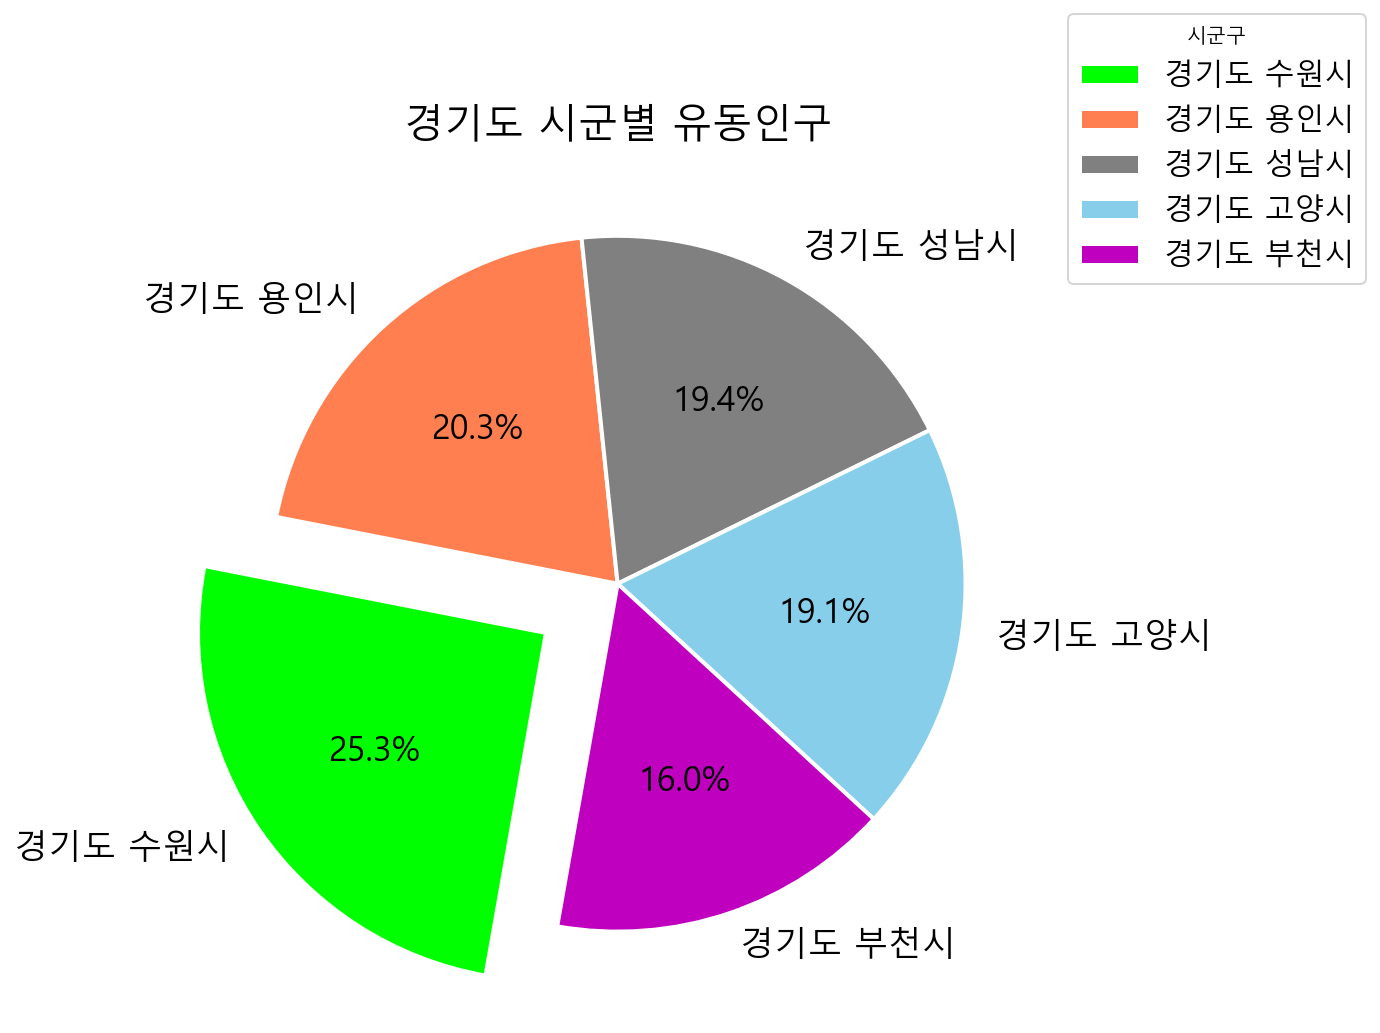

In [35]:
# 경기도 시군별 유동인구수 합계 데이터를 pie chart로 시각화
labels = foot_top.index
foot = foot_top['유동인구수']

# explode로 pie chart 중심 조각 갈라지는 것 표현
explode = (0.25, 0, 0, 0, 0) 

# 각 영역의 색상 지정
colors=['lime','coral','gray','skyblue','m']
# 부채꼴 스타일 지정 {부채꼴 영역의 너비(반지름 비율), 테두리 색상, 테두리 선의 너비}
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 2}

# pie chart로 데이터 시각화
# chart 크기 설정
plt.figure(figsize=(10,8))
# foot 데이터를 autopct로 소수점 한자리까지 표시, 시계방향 부채꼴 표시, startangle로 부채꼴 각도 설정, 글자 크기 변경
pie = plt.pie(foot, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, counterclock=False, startangle=260, wedgeprops=wedgeprops, textprops = {'fontsize':17})
plt.title('경기도 시군별 유동인구', size=20)
# 범례 위치 설정
plt.legend(loc='center left',bbox_to_anchor=(1, 1), title='시군구', fontsize=15)

경기도 시군별 유동인구 분석에서 <span style='background-color: #fff5b1'>경기도 수원시</span>가 <span style="color: red">25.3%</span>로 가장 높다.

In [36]:
# 전국 순위가 아닌 정확한 경기도 시군별 유동인구 분석하기
# df_foot copy 만들기
foot_copy1 = df_foot.copy()

# 유동인구 '경기도'만 추출
find_gg_con = foot_copy1[foot_copy1['출발지역명'].str.contains('경기도', na=False)]

# '출발지역명'컬럼을 '시군구'로 변경 후, index를 '시군구'컬럼으로 변경   
gg_foot_02 = find_gg_con.rename(columns={'출발지역명':'시군구'}).set_index('시군구')

# '시군구' 기준 동일한 index끼리의 합
df_gg_foot_sum = gg_foot_02.groupby('시군구').sum()

# 동일한 행들의 값의 합을 구하기
df_gg_sum_axis = df_gg_foot_sum.sum(axis=1)

# Series를 Dataframe으로 변환
df_gg_sum_last = pd.DataFrame(df_gg_sum_axis)
# 컬럼명 변경 '유동인구수'로 변경
gg_foot_all_sum = df_gg_sum_last.rename(columns={0:'유동인구수'})
# 내림차순
gg_ft_sum = gg_foot_all_sum.sort_values(by='유동인구수', ascending=False)
gg_ft_3 = gg_ft_sum.copy()
gg_ft_3

유동인구수
시군구                  
경기도 수원시   17253480.84
경기도 용인시   13824086.00
경기도 성남시   13215839.93
경기도 고양시   13029913.27
경기도 부천시   10878696.30
경기도 안산시   10464905.35
경기도 화성시    9684517.63
경기도 남양주시   8625516.85
경기도 안양시    8393470.96
경기도 시흥시    6165714.85
경기도 평택시    6040308.78
경기도 의정부시   5793802.78
경기도 파주시    5712026.05
경기도 광주시    4554927.45
경기도 김포시    4539031.22
경기도 광명시    4479837.34
경기도 군포시    4348993.40
경기도 오산시    3381147.77
경기도 양주시    3042496.97
경기도 하남시    2760397.56
경기도 이천시    2754227.01
경기도 구리시    2683956.00
경기도 안성시    2631038.36
경기도 의왕시    2612312.72
경기도 포천시    2180353.14
경기도 여주시    1481265.15
경기도 동두천시   1434690.49
경기도 양평군    1310608.57
경기도 과천시     916429.31
경기도 가평군     763690.41
경기도 연천군     640477.09

# 6. OHCA 발생 가능 인구 추정 지역 모델 개발
    - 병원 밖에서 발생한 심장정지(out-of-hospital cardiac arrest,OHCA)는 전 세계 주요 공중 보건의 문제이며, 의학의 발전에도 불구하고 급성 심장정지(sudden cardiac arrest, SCA)는 대부분의 나라에서 주요 사인(死因)의 하나로 자리 잡고 있다. 이는 보건학적뿐만 아니라 막대한 의료비 부담을 포함하는 사회경제적인 큰 문제를 야기하고 있다. 특히나 급성 심정지는 순환정지 상태가 10분 이내에 교정되지 못하면 사망이라는 치명적인 결과를 동반하고, 이후 심박동이 회복되더라고 심각한 뇌손상이 동반되어 지속적인 치료를 해야 하거나 장애를 안고 타인에게 의존하는 삶을 살게 될 수 있다.
    
    - 우리나라도 인구의 고령화로 인해 심장정지 발생률이 점차 증가하고 추세이며,최근에는 일반인의 제세동기 시스템 접근성 증가나 심폐소생술 지침 개정 등을 포함한 생존 사슬의 여러 개선이 있은 이후 일부 지역사회에서는 OHCA 환자들의 생존율이 증가하고 있지만 그럼에도 소수의 환자들만이 성공적으로 소생하여 최소한의 신경장애를 안고 퇴원한다. 
    
    - 따라서 생존율 향상을 위해서는 심장정지 자료를 구축하고 생존율에 영향을 미치는 주요 보건 지표들을 산출하여 지역사회별 대응체계를 구축하는 것이 필수적이다. 즉, AED의 효율성 제고를 위한 출발점은 적절한 수요예측을 통한 공간적 분포를 추정하는 것이다. 
    
    - 현재 AED의 경우, 공공장소에 설치되어 있음에도 불구하고 건물 자체의 접근성 제한 때문에 OHCA의 커버리지가 높지 않다. 또한 공간 최적화 접근을 취한 연구들을 선행하여 우선순위 지역에 최적화 설치를 진행하여야 AED의 효율성을 높일 수 있다.

##  <center><우선순위 지역 추정 지수></center>
<center>- 자세한 지수 산정식은 포트폴리오 소개와 PDF를 참고함</center>

즉, 우선순위 지역 추정 지수를 산출하기 위해서는 전처리한 데이터들을 모두 <span style='background-color: #F7DDBE'>정규화</span> 시키고 <span style='background-color: #F7DDBE'>가중치</span>를 부여해야한다.

## - 데이터 정규화 과정을 위한 데이터셋 준비

In [37]:
# AED 설치 현황
df_aed = pd.DataFrame(df_gyeonggi_count_top)
gg_aed = df_aed.rename(columns={'시군명':'개수'}).copy()

In [38]:
# 경기도 총 인구수
gg_pop = population_top_10.copy()

In [39]:
# 경기도 노인 인구수
gg_old = local_old_top_10.copy()

In [40]:
# 경기도 시군별 노인비율
gg_per = local_per_top_10.copy()

In [41]:
# 경기도 시군구별 교통사고
gg_ac = gg_ac_top.copy() 

In [42]:
# 경기도 시군구별 유동인구
gg_ft = gg_ft_3.copy()

## - 데이터 정규화
    - MinMaxScaler를 사용하여 정규화한다.
    - 특성들을 특정 범위(주로 [0,1]) 로 스케일링 하는 것이며, 이상치에 매우 민감하며 회귀에 유용함.

In [43]:
# AED 설치 현황 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gg_aed[ : ] = scaler.fit_transform(gg_aed[ : ])
gg_aed

개수
용인시   1.000000
수원시   0.939778
성남시   0.927100
고양시   0.863708
화성시   0.751189
부천시   0.591125
안양시   0.445325
안산시   0.432647
남양주시  0.381933
시흥시   0.348653
평택시   0.347068
김포시   0.309033
파주시   0.294770
광명시   0.237718
군포시   0.215531
의정부시  0.198098
양평군   0.194929
양주시   0.191759
하남시   0.191759
광주시   0.155309
오산시   0.129952
의왕시   0.128368
여주시   0.114105
이천시   0.091918
구리시   0.072900
포천시   0.061807
안성시   0.038035
과천시   0.036450
동두천시  0.017433
가평군   0.004754
연천군   0.000000

In [44]:
# 경기도 연령별 인구수 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gg_pop[ : ] = scaler.fit_transform(gg_pop[ : ])
gg_pop

경기도 총 인구수
시군별            
남부     1.000000
북부     0.349862
수원시    0.114388
용인시    0.103572
고양시    0.103417
성남시    0.088138
화성시    0.085639
부천시    0.075368
남양주시   0.069419
안산시    0.060444
평택시    0.053221
안양시    0.050616
시흥시    0.047057
파주시    0.044739
김포시    0.044156
의정부시   0.042157
광주시    0.034842
하남시    0.028080
광명시    0.024723
군포시    0.022500
양주시    0.019610
오산시    0.018751
이천시    0.018199
안성시    0.014751
구리시    0.014735
의왕시    0.011845
포천시    0.010514
양평군    0.008033
여주시    0.007022
동두천시   0.005018
과천시    0.003610
가평군    0.001983
연천군    0.000000

In [45]:
# 경기도 노인 인구 수 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gg_old[ : ] = scaler.fit_transform(gg_old[ : ])
gg_old

65세 이상 노인 인구수
시군별                
남부         1.000000
북부         0.409863
고양시        0.108495
용인시        0.104711
수원시        0.096894
성남시        0.095931
부천시        0.082047
남양주시       0.074076
화성시        0.055179
안양시        0.052197
안산시        0.050187
의정부시       0.047632
평택시        0.044637
파주시        0.044405
김포시        0.039638
광주시        0.034172
시흥시        0.030846
광명시        0.024293
하남시        0.023615
양주시        0.021632
군포시        0.020983
안성시        0.017855
이천시        0.016765
양평군        0.016430
포천시        0.015417
구리시        0.012881
여주시        0.011413
오산시        0.009899
의왕시        0.009657
동두천시       0.006693
가평군        0.004680
연천군        0.000760
과천시        0.000000

In [46]:
# 경기도 시군구별 사고건수 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gg_ac[ : ] = scaler.fit_transform(gg_ac[ : ])
gg_ac

사고건수(건)
시군구           
수원시   1.000000
안산시   0.821453
용인시   0.772431
고양시   0.756465
부천시   0.734877
성남시   0.726332
평택시   0.709017
화성시   0.653699
시흥시   0.498538
광주시   0.471554
남양주시  0.442546
김포시   0.361367
파주시   0.346301
의정부시  0.342253
하남시   0.230942
이천시   0.230268
안양시   0.228019
오산시   0.211378
안성시   0.203283
양주시   0.186643
광명시   0.185293
포천시   0.167754
구리시   0.127951
군포시   0.102091
여주시   0.083202
양평군   0.075557
의왕시   0.059591
가평군   0.044749
동두천시  0.041151
연천군   0.006971
과천시   0.000000

In [47]:
# 경기도 유동인구수 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gg_ft[ : ] = scaler.fit_transform(gg_ft[ : ])
gg_ft

유동인구수
시군구               
경기도 수원시   1.000000
경기도 용인시   0.793572
경기도 성남시   0.756959
경기도 고양시   0.745767
경기도 부천시   0.616277
경기도 안산시   0.591370
경기도 화성시   0.544395
경기도 남양주시  0.480650
경기도 안양시   0.466682
경기도 시흥시   0.332585
경기도 평택시   0.325036
경기도 의정부시  0.310198
경기도 파주시   0.305276
경기도 광주시   0.235626
경기도 김포시   0.234669
경기도 광명시   0.231106
경기도 군포시   0.223230
경기도 오산시   0.164971
경기도 양주시   0.144587
경기도 하남시   0.127606
경기도 이천시   0.127235
경기도 구리시   0.123005
경기도 안성시   0.119819
경기도 의왕시   0.118692
경기도 포천시   0.092691
경기도 여주시   0.050610
경기도 동두천시  0.047807
경기도 양평군   0.040338
경기도 과천시   0.016611
경기도 가평군   0.007417
경기도 연천군   0.000000

## - 가중치 부여
    - 참고자료들을 통해 변수에 가중치를 부여함.

**<가중치>**


<span style='background-color: #f5f0ff'>AED 설치 현황</span>    <span style="color: red">0.2</span>


<span style='background-color: #f5f0ff'>경기도 시군구별 총 인구수</span>    <span style="color: red">0.15</span>


<span style='background-color: #f5f0ff'>경기도 시군구별 노인수</span>    <span style="color: red">0.3</span>


<span style='background-color: #f5f0ff'>경기도 시군구별 사고건수</span>    <span style="color: red">0.47</span>


<span style='background-color: #f5f0ff'>경기도 시군구별 유동인구</span>    <span style="color: red">0.35</span>

In [48]:
# AED 설치 지역 현황 가중치 부여 (r=0.2)
gg_aed_v = gg_aed["개수"]*0.2
# DataFrame 변경
df_gg_aed = pd.DataFrame(gg_aed_v, columns=['개수'])

In [49]:
# 경기도 시군구별 총 인구수 가중치 부여 (r=0.15)
gg_pop_v = gg_pop["경기도 총 인구수"]*0.15
# DataFrame 변경
df_gg_pop = pd.DataFrame(gg_pop_v, columns=['경기도 총 인구수'])

In [50]:
# 경기도 시군구별 노인수 가중치 부여 (r=0.3)
gg_old_v = gg_old["65세 이상 노인 인구수"]*0.3
# DataFrame 변경
df_gg_old = pd.DataFrame(gg_old_v, columns=['65세 이상 노인 인구수'])

In [51]:
# 경기도 시군구별 사고건수 가중치 부여 (r=0.47)
gg_ac_v = gg_ac["사고건수(건)"]*0.47
# DataFrame 변경
df_gg_ac = pd.DataFrame(gg_ac_v, columns=['사고건수(건)'])

In [52]:
# 경기도 시군구별 유동인구 가중치 부여 (r=0.35)
gg_ft_v = gg_ft["유동인구수"]*0.35
# DataFrame 변경
df_gg_ft = pd.DataFrame(gg_ft_v, columns=['유동인구수'])

여기서 <span style='background-color: #f6f8fa'>'경기도 시군구별 유동인구 데이터'</span>는 후에 나올 join에 합칠 index가 다르기 때문에 index에서 <span style="color: #008000">'경기도' 단어 제거 과정</span>이 필요함.

In [53]:
# index 단어 분리를 위해 원본 copy
ff = df_gg_ft.copy()
# index 초기화
ff.reset_index(drop =False, inplace=True)
# 데이터프레임에서 '유동인구수' 컬럼만 추출
ff7=ff[['유동인구수']]

# 데이터프레임에서 '시군구' 컬럼 추출 후, 공백 기준으로 분리하고 list로 만듬.
ff['시군구'].str.split(' ').tolist()

#  경기도 시군구별 유동인구 가중치 데이터를 DataFrame 변경 후, 
#공백 기준으로 단어를 분리해서 컬럼명을 '제거'와'시군구'로 변경
ff2 = pd.DataFrame(ff['시군구'].str.split(' ').tolist(),columns=['제거','시군구'])
# '제거' 컬럼 제거
ff4 = ff2.drop('제거', axis=1)
# '유동인구수'만 추출했던 데이터프레임과 합침.
ff5 = ff4.join(ff7, how='outer')
# '시군구'로 index 변경
df_gg_acc = ff5.set_index("시군구")

## - join
    - join을 사용하여 정규화한 데이터들을 하나의 DataFrame으로 합친다.

In [54]:
# 정규화된 'AED 설치 현황'과 '경기도 총 인구수' 데이터 join
# how='outer'를 사용하여 겹치지 않는 index도 표시
gg_aed_pop = df_gg_aed.join(df_gg_pop, how='outer')

In [55]:
# 정규화된 '경기도 시군구별 사고건수'데이터를 join
gg_aed_pop_ac = gg_aed_pop.join(df_gg_ac, how='outer')

In [56]:
# 정규화된 '경기도 시군구별 유동인구수'데이터를 join
gg_aed_pop_acc = gg_aed_pop_ac.join(df_gg_acc, how='outer')

In [57]:
# 정규화된 '경기도 시군구별 노인 인구수'데이터를 join
gg_aed_pop_acc_old = gg_aed_pop_acc.join(df_gg_old, how='outer')
# 경기도 지역 데이터셋 완성
gg_aed_pop_acc_old

개수  경기도 총 인구수   사고건수(건)     유동인구수  65세 이상 노인 인구수
가평군   0.000951   0.000297  0.021032  0.002596       0.001404
고양시   0.172742   0.015513  0.355539  0.261019       0.032549
과천시   0.007290   0.000541  0.000000  0.005814       0.000000
광명시   0.047544   0.003708  0.087088  0.080887       0.007288
광주시   0.031062   0.005226  0.221630  0.082469       0.010252
구리시   0.014580   0.002210  0.060137  0.043052       0.003864
군포시   0.043106   0.003375  0.047983  0.078130       0.006295
김포시   0.061807   0.006623  0.169843  0.082134       0.011892
남부         NaN   0.150000       NaN       NaN       0.300000
남양주시  0.076387   0.010413  0.207996  0.168227       0.022223
동두천시  0.003487   0.000753  0.019341  0.016732       0.002008
부천시   0.118225   0.011305  0.345392  0.215697       0.024614
북부         NaN   0.052479       NaN       NaN       0.122959
성남시   0.185420   0.013221  0.341376  0.264936       0.028779
수원시   0.187956   0.017158  0.470000  0.350000       0.029068
시흥시   0.069731   0.007059  0.234313  0.116405       0.009254
안산시   0.086529   0.009067  0.386083  0.206979       0.015056
안성시   0.007607   0.002213  0.095543  0.041937       0.005357
안양시   0.089065   0.007592  0.107169  0.163339       0.015659
양주시   0.038352   0.002941  0.087722  0.050605       0.006489
양평군   0.038986   0.001205  0.035512  0.014118       0.004929
여주시   0.022821   0.001053  0.039105  0.017714       0.003424
연천군   0.000000   0.000000  0.003276  0.000000       0.000228
오산시   0.025990   0.002813  0.099348  0.057740       0.002970
용인시   0.200000   0.015536  0.363043  0.277750       0.031413
의왕시   0.025674   0.001777  0.028008  0.041542       0.002897
의정부시  0.039620   0.006324  0.160859  0.108569       0.014290
이천시   0.018384   0.002730  0.108226  0.044532       0.005030
파주시   0.058954   0.006711  0.162761  0.106847       0.013321
평택시   0.069414   0.007983  0.333238  0.113763       0.013391
포천시   0.012361   0.001577  0.078844  0.032442       0.004625
하남시   0.038352   0.004212  0.108543  0.044662       0.007084
화성시   0.150238   0.012846  0.307239  0.190538       0.016554

# - 상관분석(Correlation Analysis)
    - 변수 간의 상관관계분석을 통해 변수의 중요도를 파악한다.

In [58]:
# 상관관계 분석

# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [59]:
corr_df = gg_aed_pop_acc_old.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))

s = corr_df.unstack()

# Series이므로 DataFrame으로 변경한다. 
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

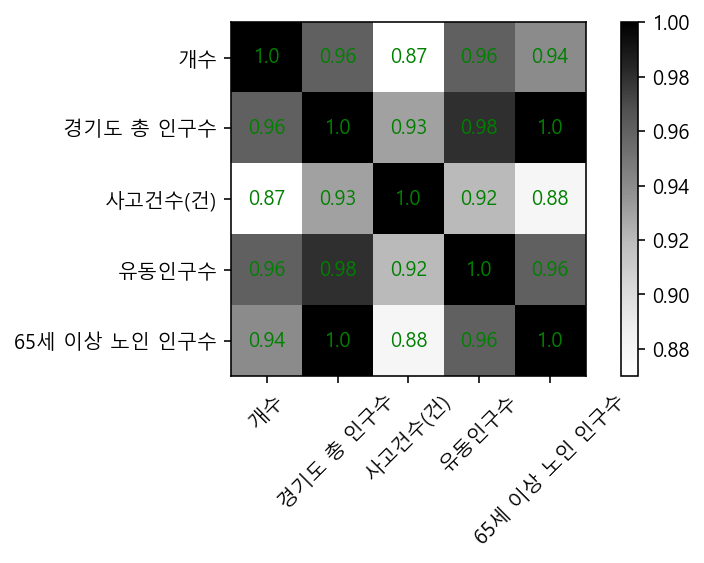

In [60]:
# Heatmap 데이터 시각화

fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='Greys') # 색상 선택

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

plt.xticks(rotation=45) # x축 기울기 설정
plt.rcParams['figure.figsize'] = [15, 5] # [width, height] (inches) 사이즈 설정

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()    

상관분석을 통해 <span style='background-color: #fff5b1'>변수간의 중요도</span>를 파악 할 수 있다.

현재 AED의 설치 개수가 인구수와 관계성이 높음을 확인 할 수 있다. 

In [61]:
# 최종 지수 도출
# join 시킨 DataFrame의 동일한 index 행값의 합을 구함.
gg_last = gg_aed_pop_acc_old.sum(axis=1)
# 'OHCA 발생 가능 지수' DataFrame 생성
gg = pd.DataFrame(gg_last, columns=['OHCA 발생 가능 지수'])
# 내림차순 정렬
gg_top = gg.sort_values('OHCA 발생 가능 지수', ascending=False)
# 최종적으로 지역별 OHCA 발생 가능 지수 도출
gg_top

OHCA 발생 가능 지수
수원시        1.054182
용인시        0.887742
고양시        0.837360
성남시        0.833732
부천시        0.715234
안산시        0.703714
화성시        0.677414
평택시        0.537789
남양주시       0.485246
남부         0.450000
시흥시        0.436761
안양시        0.382824
광주시        0.350639
파주시        0.348594
김포시        0.332298
의정부시       0.329661
광명시        0.226515
하남시        0.202853
오산시        0.188861
양주시        0.186110
이천시        0.178901
군포시        0.178890
북부         0.175438
안성시        0.152656
포천시        0.129849
구리시        0.123844
의왕시        0.099897
양평군        0.094749
여주시        0.084117
동두천시       0.042321
가평군        0.026280
과천시        0.013645
연천군        0.003504

<AxesSubplot:title={'center':'경기도 내 노인비율'}>

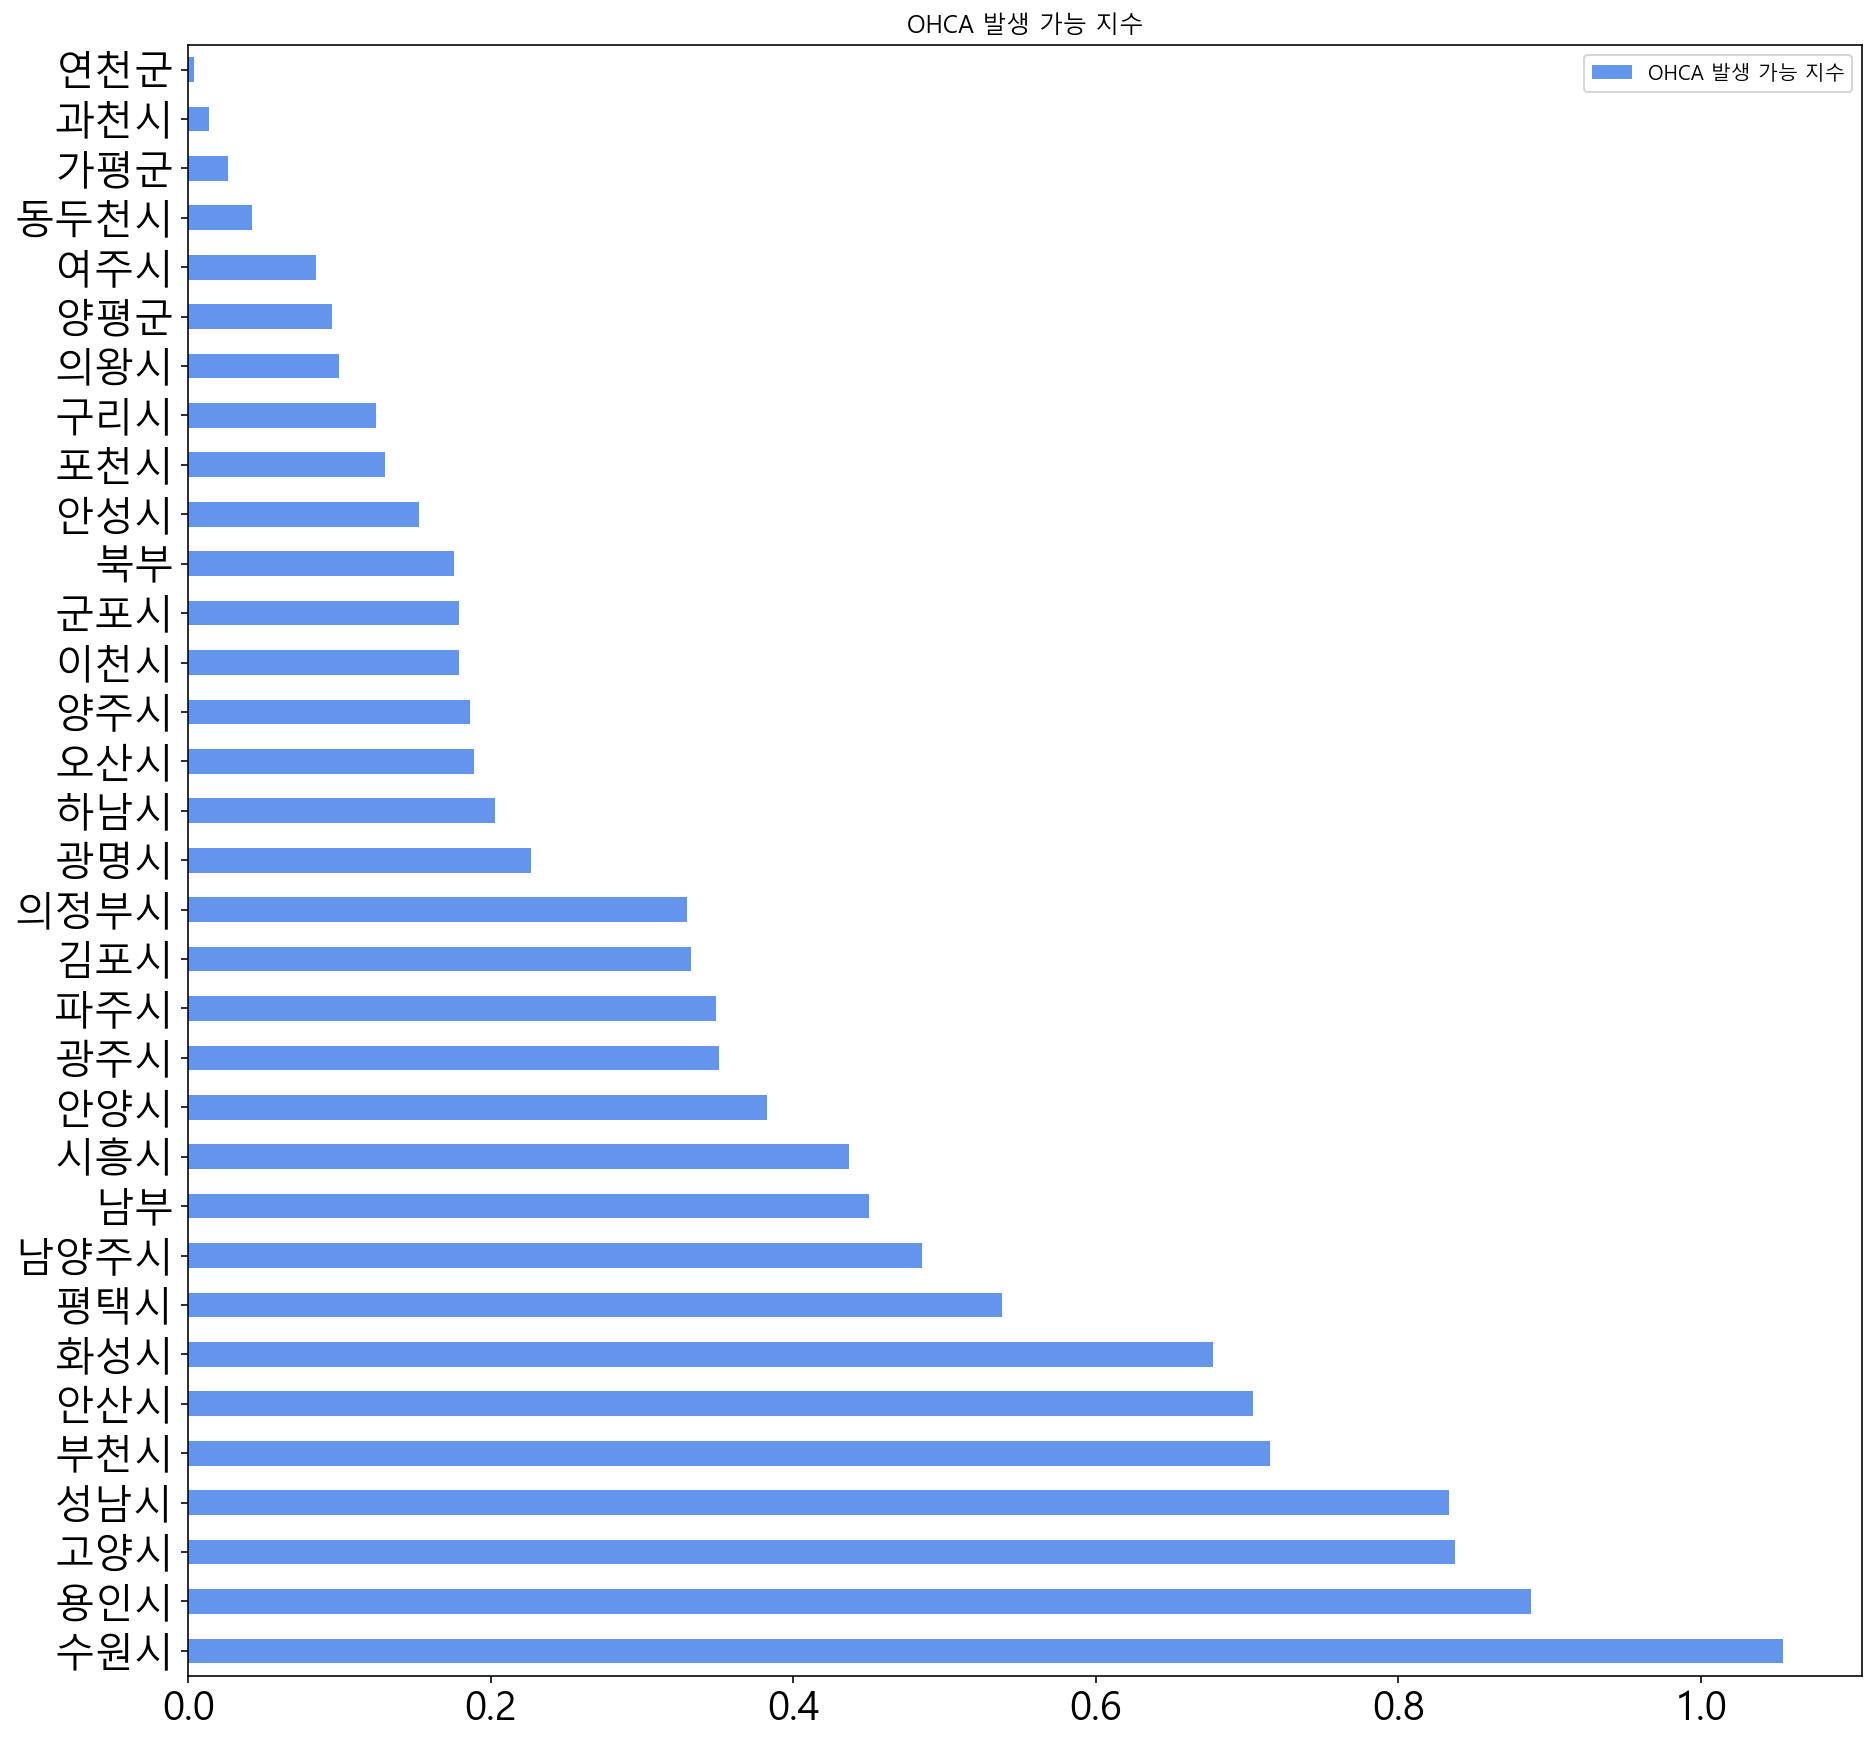

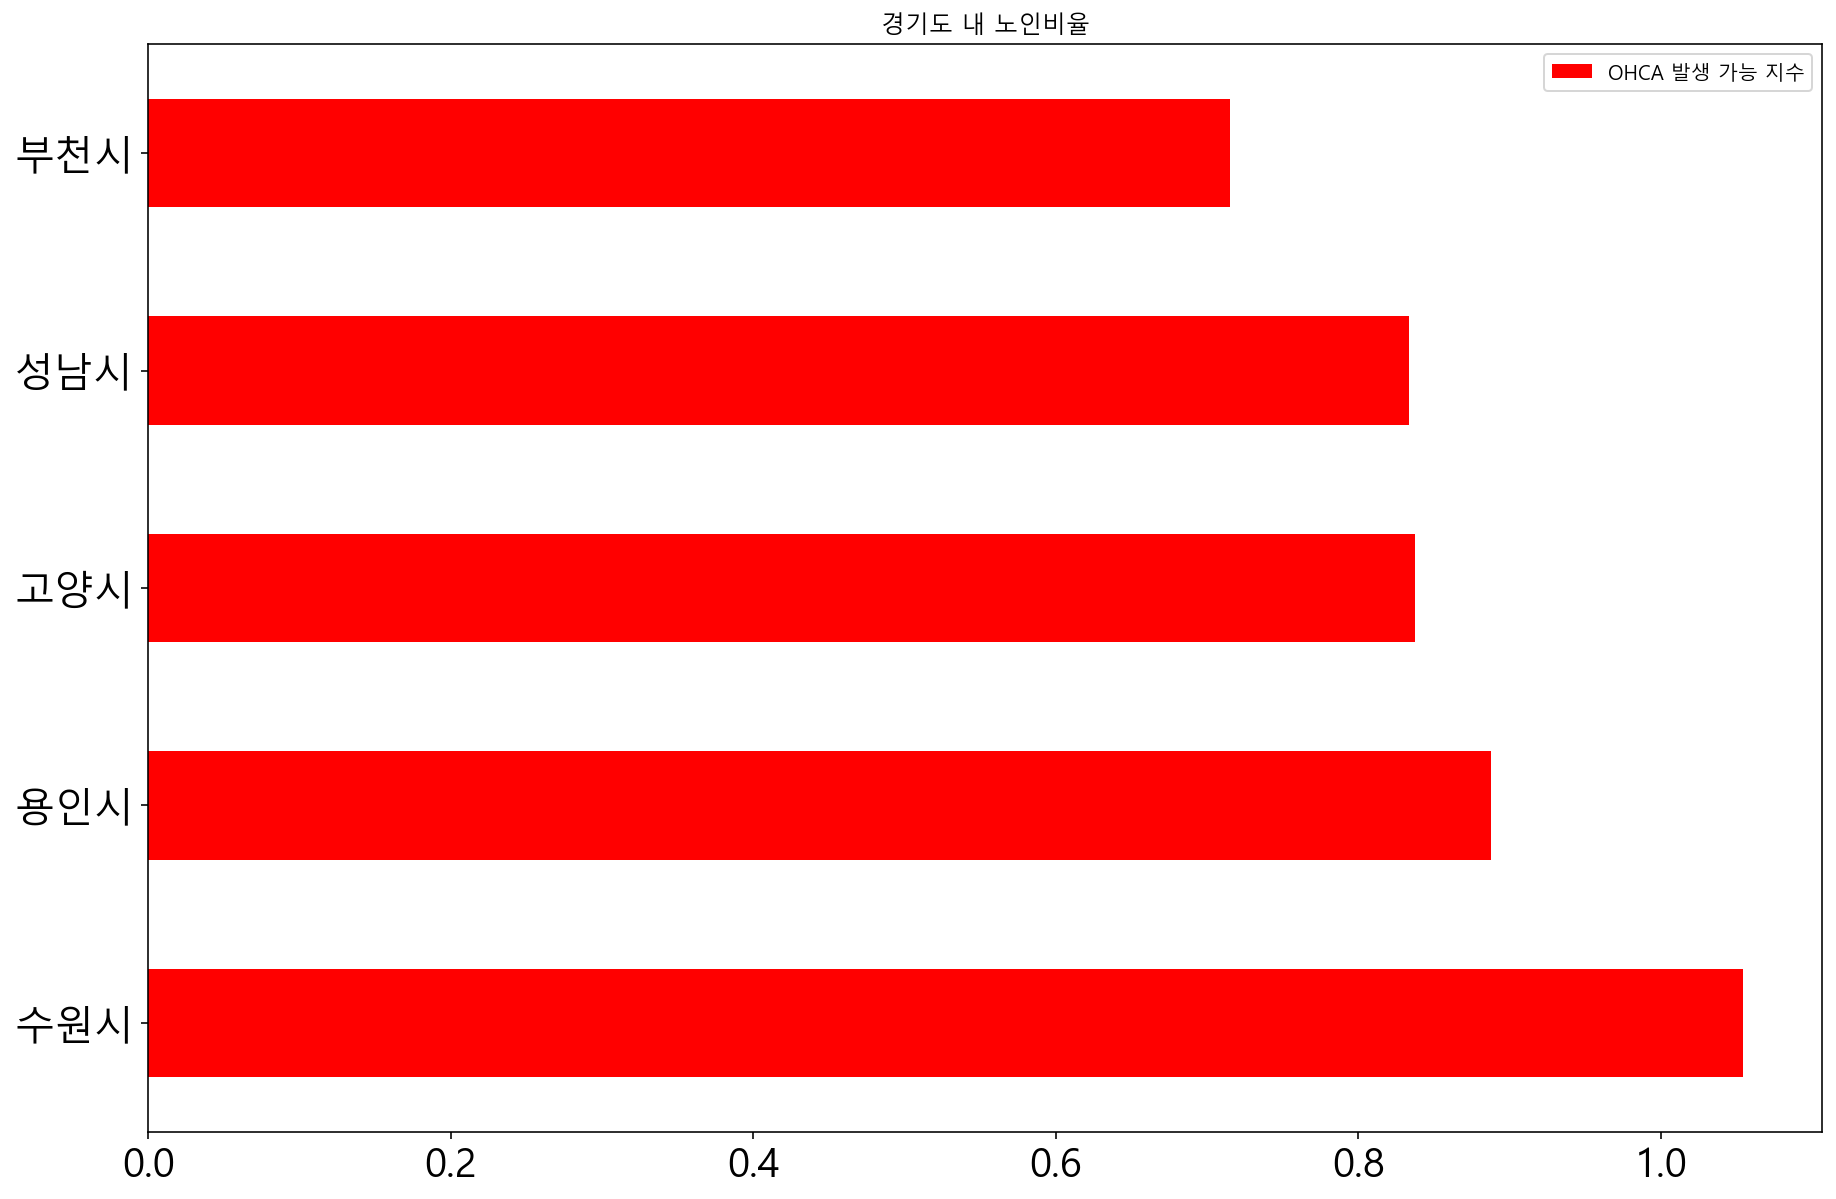

In [62]:
# '자동심장충격기(AED) 추가 설치 우선순위 지역'시각화
gg_top.plot.barh(width=0.5, color='cornflowerblue', title ='OHCA 발생 가능 지수', figsize=(15,15), legend=True, fontsize=20)

# 상위 5개 지역 시각화

gg_top.head().plot(kind='barh',color='red',  title ='경기도 내 노인비율', figsize=(15,10), legend=True, fontsize=20)

최종적인 '자동심장충격기(AED) 추가 설치 우선순위 지역' 분석 결과로 상위 5개의 지역이 도출 되었다. 

1. <span style="color: red">수원시</span>
2. <span style="color: #0000FF">용인시</span>
3. <span style="color: #008000">고양시</span>
4. <span style="color: #808080">성남시</span>
5. 부천시

# - 시각화를 통한 지역 단계 구분도
    - folium를 사용하여 지도상에 AED 최적 설치 우선순위 지역을 단계적으로 구분하여 알아본다.

In [63]:
# 원본을 위해 사본을 만듬.
gg_new_map = gg_top.copy()

# folium 시각화를 위해 인덱스 초기화 후, 기존 인덱스를 '시군구' 컬럼으로 변경함.
gg_new_map2 = gg_new_map.reset_index().rename(columns={'index':'시군구'})

# 필요없는 행 삭제 
gg_end = gg_new_map2.drop(index=[9,22])
gg_end

시군구  OHCA 발생 가능 지수
0    수원시       1.054182
1    용인시       0.887742
2    고양시       0.837360
3    성남시       0.833732
4    부천시       0.715234
5    안산시       0.703714
6    화성시       0.677414
7    평택시       0.537789
8   남양주시       0.485246
10   시흥시       0.436761
11   안양시       0.382824
12   광주시       0.350639
13   파주시       0.348594
14   김포시       0.332298
15  의정부시       0.329661
16   광명시       0.226515
17   하남시       0.202853
18   오산시       0.188861
19   양주시       0.186110
20   이천시       0.178901
21   군포시       0.178890
23   안성시       0.152656
24   포천시       0.129849
25   구리시       0.123844
26   의왕시       0.099897
27   양평군       0.094749
28   여주시       0.084117
29  동두천시       0.042321
30   가평군       0.026280
31   과천시       0.013645
32   연천군       0.003504

In [64]:
# 경기도 시군구 json파일 불러오기
geo_path = ('gg_map_4326_sum.geojson')

sido_map = json.load(open(geo_path, encoding='utf-8'))

In [65]:
# json 파일 안의 행정구역 명이 제대로 있는지 확인
sido_map['features'][0]['properties']

{'SIG_CD': '41111', 'SIG_ENG_NM': 'Jangan-gu, Suwon-si', 'SIG_KOR_NM': '수원시'}

In [66]:
# 경기도의 지도를 가져옴. 경기도 좌표값과 확대를 8로 선택
gg_map = folium.Map(location=[37.567167,127.190292], zoom_start = 8.5)

In [67]:
# folium 단계구분 시각화
folium.Choropleth(
    geo_data = sido_map, # geo json 파일로 sido_map을 사용
    data = gg_end, # data로 gg_end 사용하여 'OHCA 발생 가능 지수'기준으로 단계화
    columns = ["시군구","OHCA 발생 가능 지수"], # data에서 사용할 컬럼 값
    fill_color = 'Reds',# geo json 색상 설정
    key_on = 'feature.properties.SIG_KOR_NM', # 시군구 - SIG_KOR_NM 매핑
    fill_opacity=0.7, # 지도 투명도
    line_opacity=0.5, # 경계선 투명도
    line_weight =1.5, # 경계선 굵기
    legend_name="OHCA 발생 가능 지수", # 범례 이름
).add_to(gg_map)

gg_map

folium를 통해 지도 위에 단계구분도를 나타내며, <span style="color: red">"OHCA 발생 가능 지수"가 높을수록 색이 진해지며</span> 위험지수 지역을 나타냄. 앞서 나왔던 <span style='background-color: #F7DDBE'>수원시, 용인시, 고양시, 성남시, 부천시순으로 높은 수치</span>임을 알 수 있음. 

## - 마무리

분석 결과에 대해 좀 더 알아보기 위해 포털사이트에 검색한 결과 상위 5개의 지역 대부분에서 재난안전대책을 강화시키기 위해 AED 설치와 교육에 노력하고 있음.

[기사] "재난안전대책 손보는 경기 지자체들"
http://www.naeil.com/news_view/?id_art=441513